<a href="https://colab.research.google.com/github/aimlgoat/SupervisedLearning/blob/main/CustomerMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Classification Project: Bancassurance

## Problem Statement

### Context

Best insurance company and My Bank have set up a Bancassurance (Bancassurance is a relationship between a bank and an insurance company). Now using the data of liability customers of My Bank, The Best insurance company wants to convert customers with both a life insurance policy and an account in My bank to loan customers(taking a loan against a life insurance policy)

A campaign that the company ran last year for liability customers showed a healthy conversion rate of over 12.56% success. You are provided with data of customers who have an account in My bank and life insurance policy in the Best insurance company

You as a data scientist at the Best insurance company have to build a model to identify the positively responding customers who have a higher probability of purchasing the loan. This will increase the success ratio and reduce the cost of the campaign.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* CUST_ID: Unique Customer ID
* Target: Field - 1: Responder, 0:  Non-Responder
* Age: Customer Age in years
* Gender: Male / Female / Other
* Balance: Monthly Average Balance
* Occupation: Professional /  Salaried / Self Employed / SelfEmployed Non Professional.
* SCR: Marketing Score
* HOLDING_PERIOD: Duration in days to hold the  money
* ACC_TYPE: Account Type: Current Account / Saving Account
* ACC_OP_DATE: Account Open Date
* LEN_OF_RLTN_IN_MNTH: Length of Relationship in  Months
* NO_OF_L_CR_TXNS: Number of Credit Transactions
* NO_OF_BR_CSH_WDL_DR_TXNS: Branch Cash Withdrawal Debit  Transactions
* NO_OF_ATM_DR_TXNS: Number of ATM Debit  Transactions
* NO_OF_NET_DR_TXNS: Number of Net Banking Debit  Transactions
* NO_OF_MOB_DR_TXNS: Number of Mobile Banking  Debit Transactions
* NO_OF_CHQ_DR_TXNS: Number of Cheque Debit  Transactions
* FLG_HAS_CC: Has Credit Card - 1: Yes, 0: No
* AMT_ATM_DR: Amount Withdrawn from ATM
* AMT_BR_CSH_WDL_DR: Amount cash withdrawn from  Branch
* AMT_CHQ_DR: Amount debited by Cheque  Transactions
* AMT_NET_DR: Amount debited by Net  Transactions
* AMT_MOB_DR: Amount debited by Mobile  Transactions
* FLG_HAS_ANY_CHGS: Flag: Has any banking charges
* FLG_HAS_NOMINEE: Flag: Has Nominee - 1: Yes, 0:  No
* FLG_HAS_OLD_LOAN: Flag: Has any earlier loan - 1:  Yes, 0: No

## Loading libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)



## Loading the dataset

In [ ]:
filename='/content/drive/MyDrive/aiml/My+Bank.csv'
Bank_data = pd.read_csv(filename) ##  Complete the code to read the data

In [ ]:
# copying data to another variable to avoid any changes to original data
data = Bank_data.copy()

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

### View the first and last 5 rows of the dataset.

In [ ]:
data.head(5) ##  Complete the code to view top 5 rows of the data

CUST_ID  TARGET  AGE GENDER     BALANCE OCCUPATION  SCR  HOLDING_PERIOD  \
0   C7927       0   27      M     3383.75   SELF-EMP  776              30   
1   C6877       0   47      M   287489.04        SAL  324              28   
2  C19922       0   40      M    18216.88   SELF-EMP  603               2   
3   C8183       0   53      M    71720.48        SAL  196              13   
4  C12123       0   36      M  1671622.89       PROF  167              24   

  ACC_TYPE ACC_OP_DATE  LEN_OF_RLTN_IN_MNTH  NO_OF_L_CR_TXNS  \
0       SA   3/23/2005                  146                7   
1       SA  10-11-2008                  104                8   
2       SA   4/26/2012                   61               10   
3       CA  07-04-2008                  107               36   
4       SA  12/29/2001                  185               20   

   NO_OF_BR_CSH_WDL_DR_TXNS  NO_OF_ATM_DR_TXNS  NO_OF_NET_DR_TXNS  \
0                         0                  1                  2   
1                         0                  1                  1   
2                         1                  1                  1   
3                         4                  2                  3   
4                         1                  0                  0   

   NO_OF_MOB_DR_TXNS  NO_OF_CHQ_DR_TXNS  FLG_HAS_CC  AMT_ATM_DR  \
0                  0                  0           0       13100   
1                  0                  0           0        6600   
2                  0                  2           0       11200   
3                  1                  4           0       26100   
4                  0                  0           0           0   

   AMT_BR_CSH_WDL_DR  AMT_CHQ_DR  AMT_NET_DR  AMT_MOB_DR  FLG_HAS_ANY_CHGS  \
0                  0           0    973557.0           0                 0   
1                  0           0    799813.0           0                 1   
2             561120       49320    997570.0           0                 1   
3             673590       60780    741506.0       71388                 0   
4             808480           0         0.0           0                 0   

   FLG_HAS_NOMINEE  FLG_HAS_OLD_LOAN  
0                1                 1  
1                1                 0  
2                1                 1  
3                1                 0  
4                1                 0

In [ ]:
data.tail(5) ##  Complete the code to view last 5 rows of the data

CUST_ID  TARGET  AGE GENDER    BALANCE OCCUPATION  SCR  HOLDING_PERIOD  \
19995   C4520       0   41      F  181029.01       SENP  598              15   
19996  C10147       0   37      F   46624.98   SELF-EMP  299              11   
19997   C2392       0   30      M  142433.53       PROF  722              11   
19998  C14659       0   46      M  394654.75        SAL  234               4   
19999  C12911       1   41      M    7152.60   SELF-EMP  561              12   

      ACC_TYPE ACC_OP_DATE  LEN_OF_RLTN_IN_MNTH  NO_OF_L_CR_TXNS  \
19995       SA  09-04-2003                  165                4   
19996       SA  05-03-2013                   49               17   
19997       SA  11-01-2007                  115               20   
19998       SA   8/22/2006                  129               11   
19999       SA   6/21/2014                   35               10   

       NO_OF_BR_CSH_WDL_DR_TXNS  NO_OF_ATM_DR_TXNS  NO_OF_NET_DR_TXNS  \
19995                         1                  0                  0   
19996                         4                  2                  3   
19997                         8                  2                  0   
19998                         1                  1                  0   
19999                         1                  1                  0   

       NO_OF_MOB_DR_TXNS  NO_OF_CHQ_DR_TXNS  FLG_HAS_CC  AMT_ATM_DR  \
19995                  0                  2           0           0   
19996                  1                  4           0       17200   
19997                  1                  5           0       33400   
19998                  0                  4           1        7700   
19999                  0                  4           1       15100   

       AMT_BR_CSH_WDL_DR  AMT_CHQ_DR  AMT_NET_DR  AMT_MOB_DR  \
19995             277050       59460         0.0           0   
19996             705740       24300    902772.0       46829   
19997              83740       62210         0.0      132010   
19998             195790       43550         0.0           0   
19999             276520       61510         0.0           0   

       FLG_HAS_ANY_CHGS  FLG_HAS_NOMINEE  FLG_HAS_OLD_LOAN  
19995                 0                1                 1  
19996                 0                1                 0  
19997                 0                1                 0  
19998                 0                1                 0  
19999                 0                1                 0

### Understand the shape of the dataset.

In [ ]:
data.shape ##  Complete the code to view dimensions of the data

(20000, 26)

### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CUST_ID                   20000 non-null  object 
 1   TARGET                    20000 non-null  int64  
 2   AGE                       20000 non-null  int64  
 3   GENDER                    20000 non-null  object 
 4   BALANCE                   20000 non-null  float64
 5   OCCUPATION                20000 non-null  object 
 6   SCR                       20000 non-null  int64  
 7   HOLDING_PERIOD            20000 non-null  int64  
 8   ACC_TYPE                  20000 non-null  object 
 9   ACC_OP_DATE               20000 non-null  object 
 10  LEN_OF_RLTN_IN_MNTH       20000 non-null  int64  
 11  NO_OF_L_CR_TXNS           20000 non-null  int64  
 12  NO_OF_BR_CSH_WDL_DR_TXNS  20000 non-null  int64  
 13  NO_OF_ATM_DR_TXNS         20000 non-null  int64  
 14  NO_OF_

### Checking the Statistical Summary

In [ ]:
data.describe().T

count           mean            std    min  \
TARGET                    20000.0       0.125600       0.331406    0.0   
AGE                       20000.0      38.418150       9.577985   21.0   
BALANCE                   20000.0  511362.192118  723592.961792    0.0   
SCR                       20000.0     440.150300     249.887582  100.0   
HOLDING_PERIOD            20000.0      14.955650       8.642634    1.0   
LEN_OF_RLTN_IN_MNTH       20000.0     125.239300      54.953936   29.0   
NO_OF_L_CR_TXNS           20000.0      12.348050      12.151921    0.0   
NO_OF_BR_CSH_WDL_DR_TXNS  20000.0       1.883000       2.263596    0.0   
NO_OF_ATM_DR_TXNS         20000.0       1.028950       1.497239    0.0   
NO_OF_NET_DR_TXNS         20000.0       1.172450       2.404246    0.0   
NO_OF_MOB_DR_TXNS         20000.0       0.411750       2.009854    0.0   
NO_OF_CHQ_DR_TXNS         20000.0       2.137550       2.384893    0.0   
FLG_HAS_CC                20000.0       0.305400       0.460588    0.0   
AMT_ATM_DR                20000.0   10990.015000   15304.891499    0.0   
AMT_BR_CSH_WDL_DR         20000.0  378474.478000  331417.730129    0.0   
AMT_CHQ_DR                20000.0  124520.005150  439379.541425    0.0   
AMT_NET_DR                20000.0  237307.771646  319067.664858    0.0   
AMT_MOB_DR                20000.0   22424.704400   49484.803631    0.0   
FLG_HAS_ANY_CHGS          20000.0       0.110600       0.313644    0.0   
FLG_HAS_NOMINEE           20000.0       0.901150       0.298468    0.0   
FLG_HAS_OLD_LOAN          20000.0       0.492950       0.499963    0.0   

                                25%         50%        75%         max  
TARGET                        0.000       0.000       0.00        1.00  
AGE                          30.000      38.000      46.00       55.00  
BALANCE                   64754.025  231675.845  653876.85  8360430.57  
SCR                         227.000     364.000     644.00      999.00  
HOLDING_PERIOD                7.000      15.000      22.00       31.00  
LEN_OF_RLTN_IN_MNTH          79.000     125.000     172.00      221.00  
NO_OF_L_CR_TXNS               6.000      10.000      14.00       75.00  
NO_OF_BR_CSH_WDL_DR_TXNS      1.000       1.000       2.00       15.00  
NO_OF_ATM_DR_TXNS             0.000       1.000       1.00       25.00  
NO_OF_NET_DR_TXNS             0.000       0.000       1.00       22.00  
NO_OF_MOB_DR_TXNS             0.000       0.000       0.00       25.00  
NO_OF_CHQ_DR_TXNS             0.000       2.000       4.00       15.00  
FLG_HAS_CC                    0.000       0.000       1.00        1.00  
AMT_ATM_DR                    0.000    6900.000   15800.00   199300.00  
AMT_BR_CSH_WDL_DR          2990.000  340150.000  674675.00   999930.00  
AMT_CHQ_DR                    0.000   23840.000   72470.00  4928640.00  
AMT_NET_DR                    0.000       0.000  473970.50   999854.00  
AMT_MOB_DR                    0.000       0.000       0.00   199667.00  
FLG_HAS_ANY_CHGS              0.000       0.000       0.00        1.00  
FLG_HAS_NOMINEE               1.000       1.000       1.00        1.00  
FLG_HAS_OLD_LOAN              0.000       0.000       1.00        1.00

### Let's drop the CUST_ID column first before we proceed forward

In [ ]:
data.drop('CUST_ID',inplace=True,axis=1) ## Complete the code to drop the ID column from the dataframe

## Data Preprocessing

### Feature Engineering

In [ ]:
print(data.head(4))

   TARGET  AGE GENDER    BALANCE OCCUPATION  SCR  HOLDING_PERIOD ACC_TYPE  \
0       0   27      M    3383.75   SELF-EMP  776              30       SA   
1       0   47      M  287489.04        SAL  324              28       SA   
2       0   40      M   18216.88   SELF-EMP  603               2       SA   
3       0   53      M   71720.48        SAL  196              13       CA   

  ACC_OP_DATE  LEN_OF_RLTN_IN_MNTH  NO_OF_L_CR_TXNS  NO_OF_BR_CSH_WDL_DR_TXNS  \
0   3/23/2005                  146                7                         0   
1  10-11-2008                  104                8                         0   
2   4/26/2012                   61               10                         1   
3  07-04-2008                  107               36                         4   

   NO_OF_ATM_DR_TXNS  NO_OF_NET_DR_TXNS  NO_OF_MOB_DR_TXNS  NO_OF_CHQ_DR_TXNS  \
0                  1                  2                  0                  0   
1                  1                  1       

In [ ]:
## Converting the data type of categorical features to 'category'
cat_columns = [
    "FLG_HAS_CC",
    "FLG_HAS_ANY_CHGS",
    "FLG_HAS_NOMINEE",
    "FLG_HAS_OLD_LOAN",
    "GENDER",
    "OCCUPATION",
    "ACC_TYPE",
]
data[cat_columns] = data[cat_columns].astype('category')    # Complete the code to convert the cat_cols to category

**Extracting month and year from ACC_OP_DATE column as a specific date might not be much helpful as compared to the month and the year values.**

In [ ]:
data["ACC_OP_YEAR"] = pd.DatetimeIndex(data["ACC_OP_DATE"]).year
data["ACC_OP_Month"] = pd.DatetimeIndex(data["ACC_OP_DATE"]).month
data.drop(["ACC_OP_DATE"], axis=1, inplace=True)

In [ ]:
data["ACC_OP_YEAR"].value_counts()

2010    1321
2007    1315
2003    1313
2004    1307
2000    1276
2013    1276
2006    1273
2009    1272
2002    1269
2005    1236
2011    1225
1999    1221
2014    1194
2008    1193
2012    1160
2001    1144
2015       5
Name: ACC_OP_YEAR, dtype: int64

In [ ]:
data["ACC_OP_Month"].value_counts()

9     1795
5     1749
3     1711
12    1707
7     1684
8     1680
1     1651
11    1639
4     1637
10    1624
6     1590
2     1533
Name: ACC_OP_Month, dtype: int64

#### Observations

*

* Columns: 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS represent the number of debit transactions from different sources we can combine these columns to create one single column that has information on the total number of debit transactions.

* Columns: 'AMT_ATM_DR','AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR' represent amount  of debit transactions from different sources we can combine these columns to create one single column that has information of total amount of debit transactions

In [ ]:
data["NO_OF_L_DR_TXNS"] = (
    data["NO_OF_BR_CSH_WDL_DR_TXNS"]
    + data["NO_OF_ATM_DR_TXNS"]
    + data["NO_OF_NET_DR_TXNS"]
    + data["NO_OF_MOB_DR_TXNS"]
    + data["NO_OF_CHQ_DR_TXNS"]
)
data["AMT_OF_L_DR_TXNS"] = (
    data["AMT_ATM_DR"]
    + data["AMT_BR_CSH_WDL_DR"]
    + data["AMT_CHQ_DR"]
    + data["AMT_NET_DR"]
    + data["AMT_MOB_DR"]
)

**Dropping the columns which were used in creating total number of debit transactions and total amount of debit transactions**

In [ ]:
data.drop(
    [
        "NO_OF_BR_CSH_WDL_DR_TXNS",
        "NO_OF_ATM_DR_TXNS",
        "NO_OF_NET_DR_TXNS",
        "NO_OF_MOB_DR_TXNS",
        "NO_OF_CHQ_DR_TXNS",
        "AMT_ATM_DR",
        "AMT_BR_CSH_WDL_DR",
        "AMT_CHQ_DR",
        "AMT_NET_DR",
        "AMT_MOB_DR",
    ],
    axis=1,
    inplace=True,
)

### Checking the missing values

In [ ]:
data.isnull().sum()

TARGET                 0
AGE                    0
GENDER                 0
BALANCE                0
OCCUPATION             0
SCR                    0
HOLDING_PERIOD         0
ACC_TYPE               0
LEN_OF_RLTN_IN_MNTH    0
NO_OF_L_CR_TXNS        0
FLG_HAS_CC             0
FLG_HAS_ANY_CHGS       0
FLG_HAS_NOMINEE        0
FLG_HAS_OLD_LOAN       0
ACC_OP_YEAR            0
ACC_OP_Month           0
NO_OF_L_DR_TXNS        0
AMT_OF_L_DR_TXNS       0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

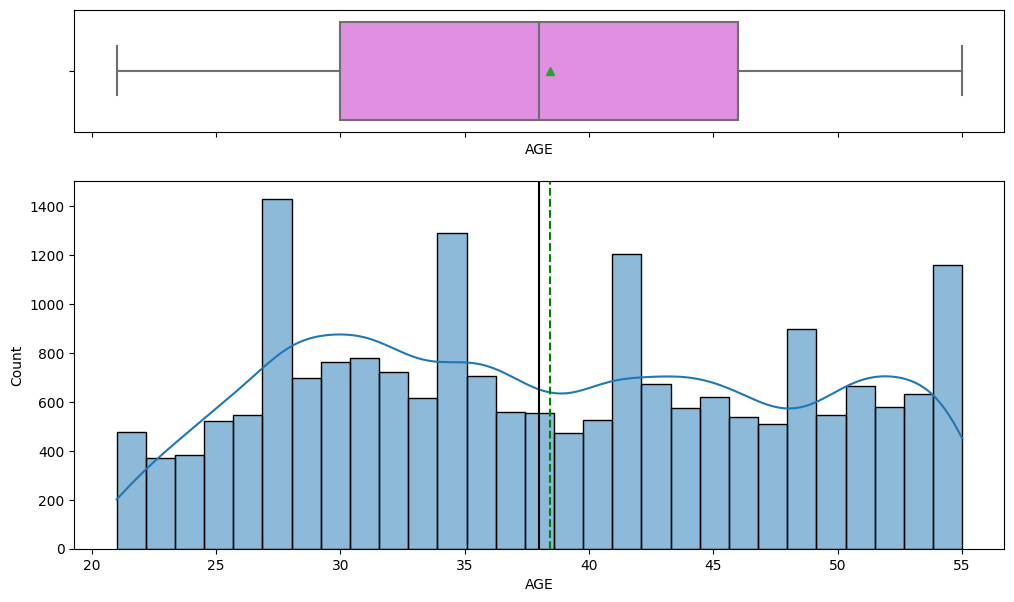

In [ ]:
histogram_boxplot(data, "AGE",kde=True)

#### Observations on Balance

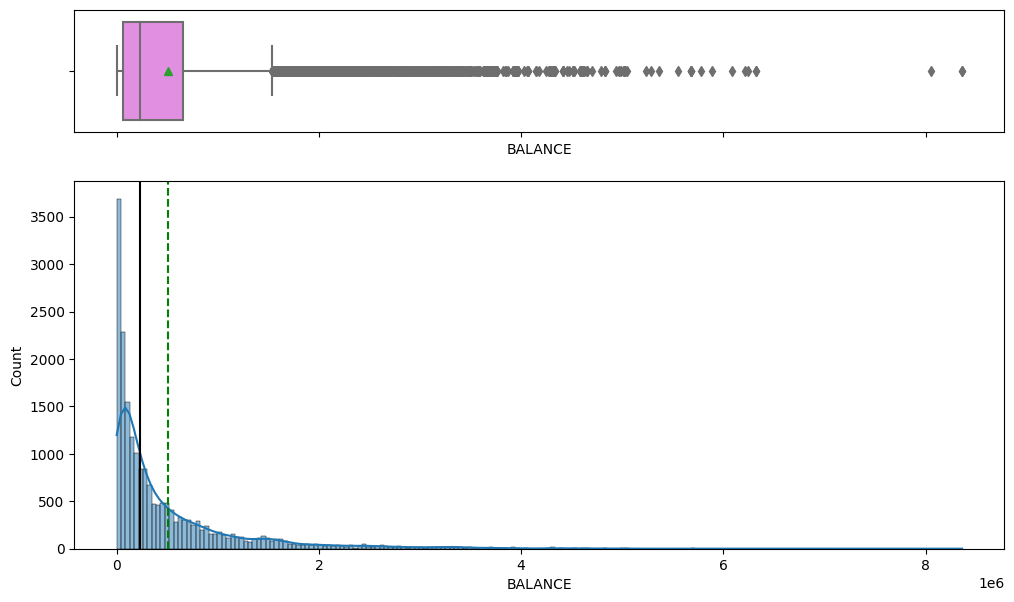

In [ ]:
histogram_boxplot(data,'BALANCE',kde=True)    ## Complete the code to get the histogram_boxplot for Balance

#### Observations on SCR

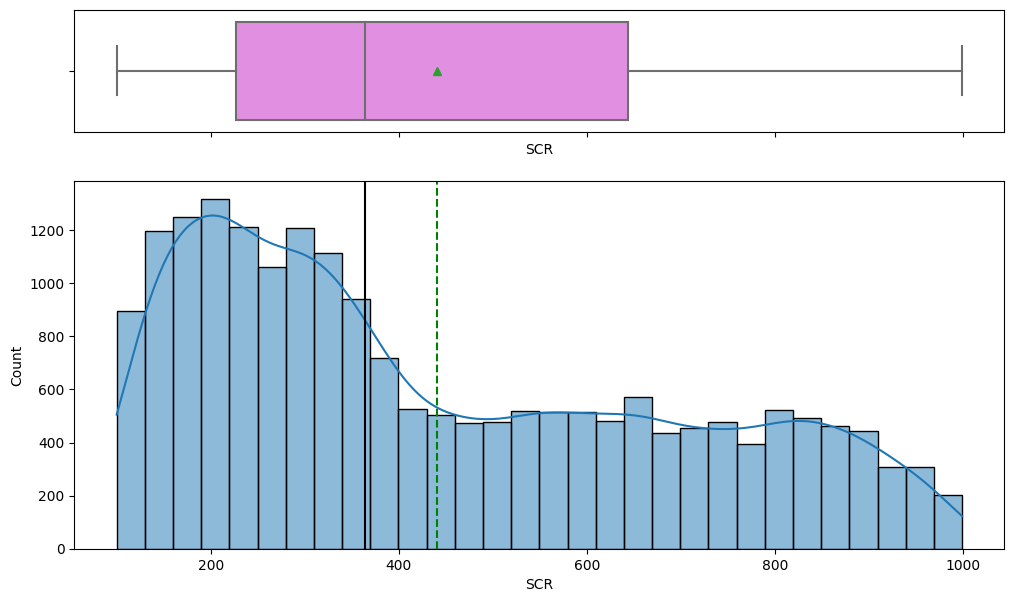

In [ ]:
histogram_boxplot(data,'SCR',kde=True)    ## Complete the code to get the histogram_boxplot for SCR

#### Observations on Holding Period

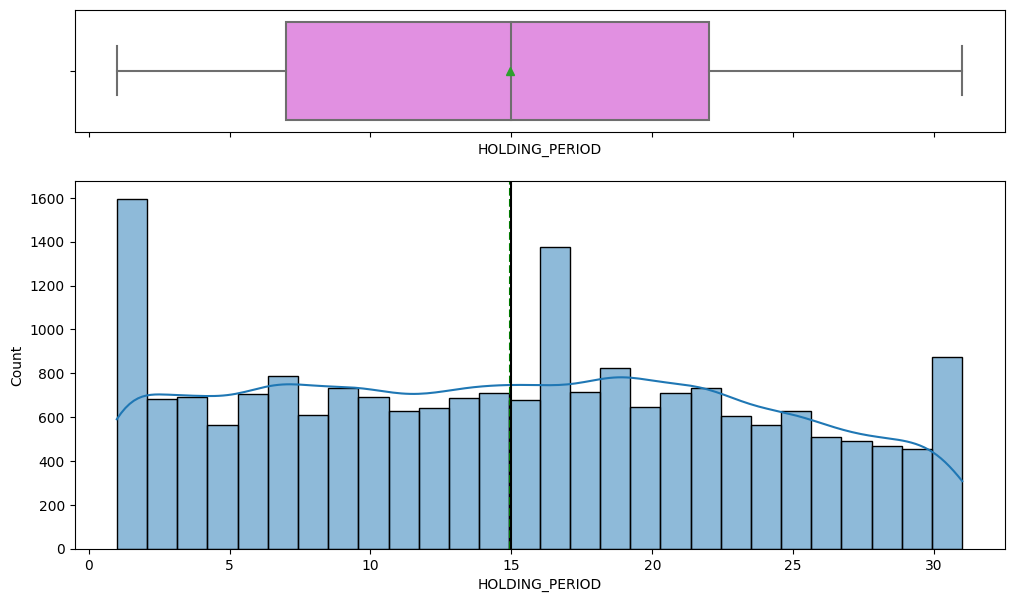

In [ ]:
histogram_boxplot(data,'HOLDING_PERIOD',kde=True)    ## Complete the code to get the histogram_boxplot for Holding Period

#### Observations on LEN_OF_RLTN_IN_MNTH

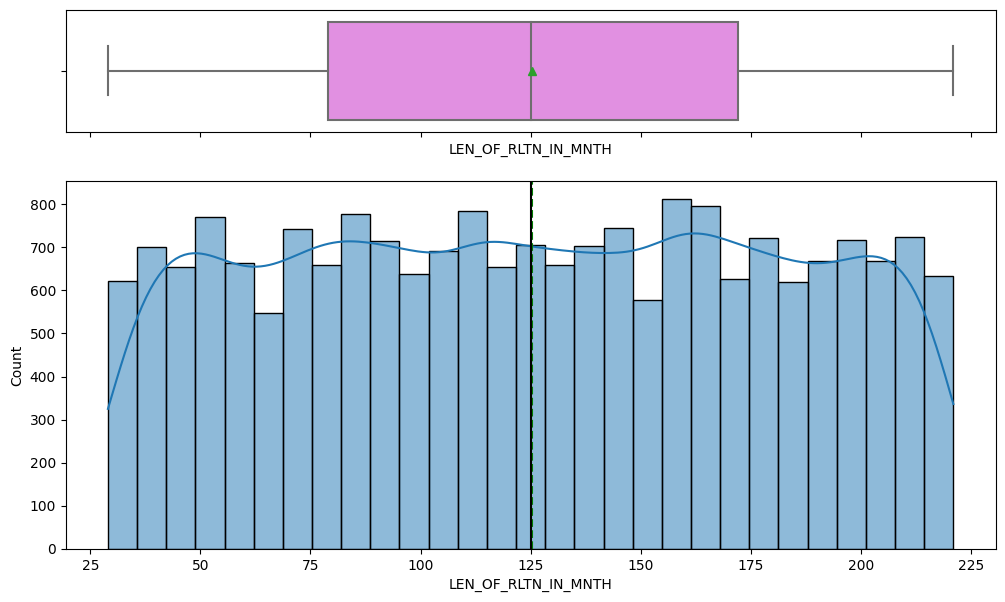

In [ ]:
histogram_boxplot(data,'LEN_OF_RLTN_IN_MNTH',kde=True)    ## Complete the code to get the histogram_boxplot for LEN_OF_RLTN_IN_MNTH

#### Observations on NO_OF_L_CR_TXNS

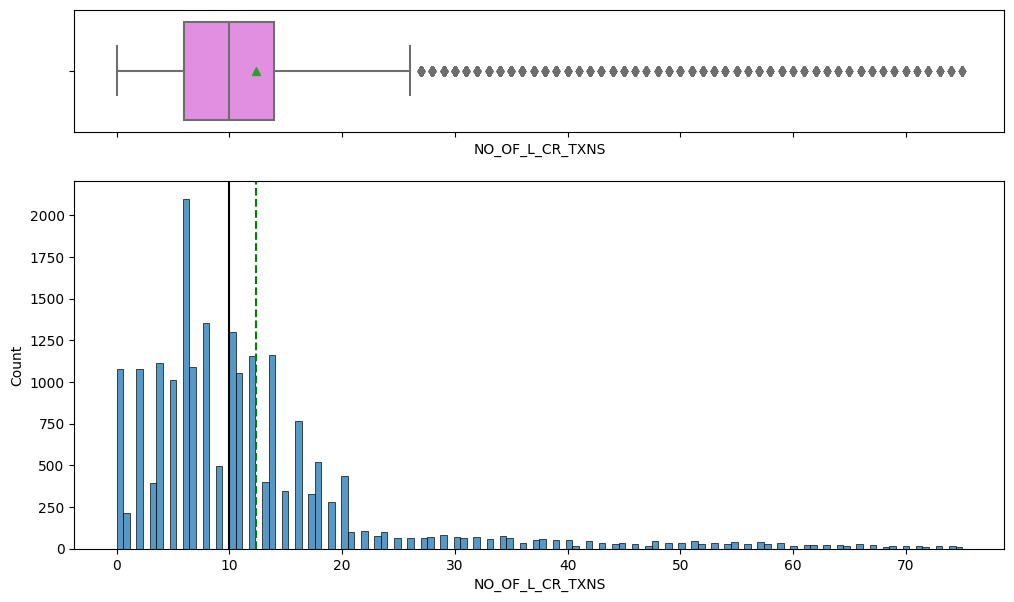

In [ ]:
histogram_boxplot(data,'NO_OF_L_CR_TXNS')    ## Complete the code to get the histogram_boxplot for NO_OF_L_CR_TXNS

#### Observations on NO_OF_L_DR_TXNS

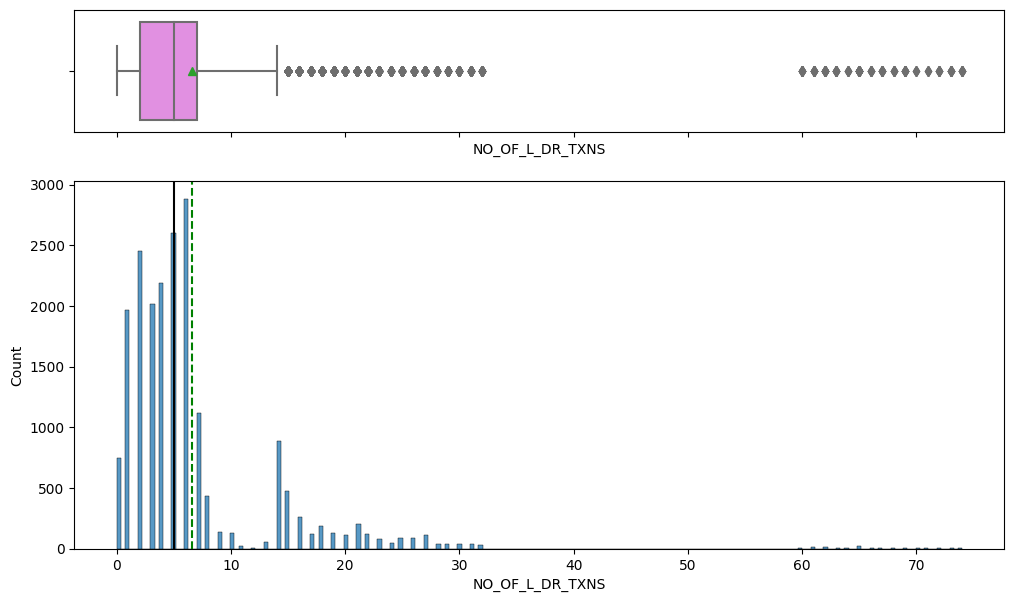

In [ ]:
histogram_boxplot(data,'NO_OF_L_DR_TXNS')    ## Complete the code to get the histogram_boxplot for NO_OF_L_DR_TXNS

#### Observations on NO_OF_L_DR_TXNS

### Bivariate Analysis

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation check

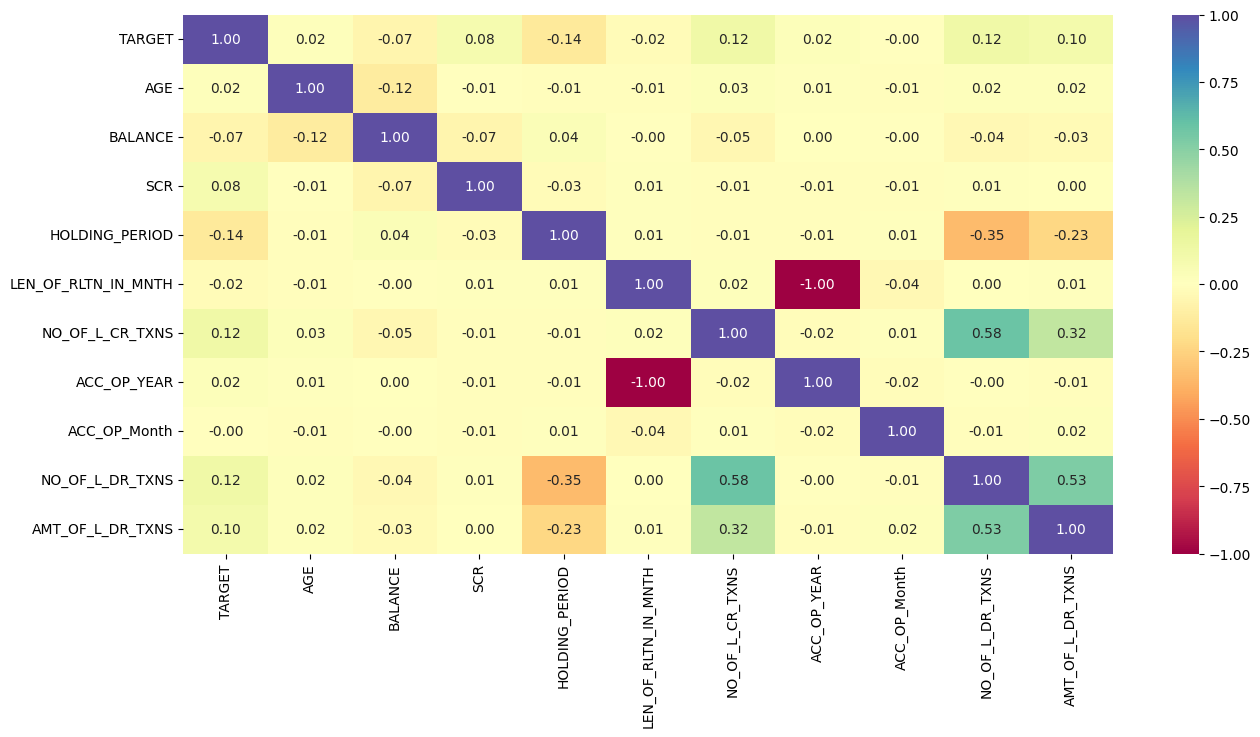

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

In [ ]:
## Dropping ACC_OP_YEAR
data = data.drop(["ACC_OP_YEAR"], axis=1)

#### Target vs Gender

TARGET      0     1    All
GENDER                    
All     17488  2512  20000
M       12446  1930  14376
F        4893   540   5433
O         149    42    191
------------------------------------------------------------------------------------------------------------------------


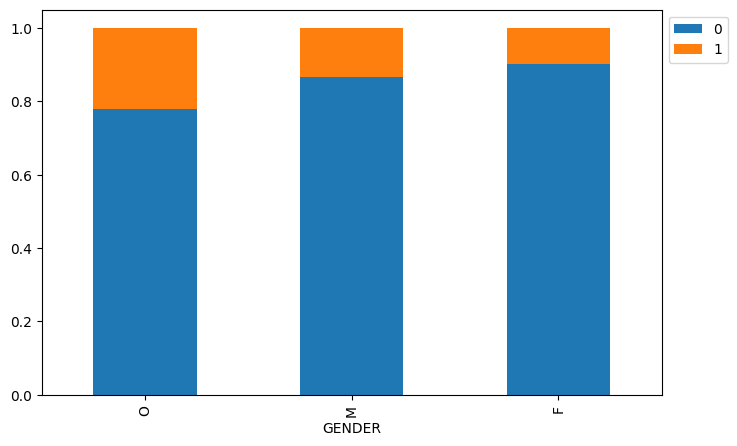

In [ ]:
stacked_barplot(data, "GENDER", "TARGET")

#### Target vs Occupation

TARGET          0     1    All
OCCUPATION                    
All         17488  2512  20000
SELF-EMP     2843   725   3568
PROF         4762   655   5417
SAL          5265   590   5855
SENP         4618   542   5160
------------------------------------------------------------------------------------------------------------------------


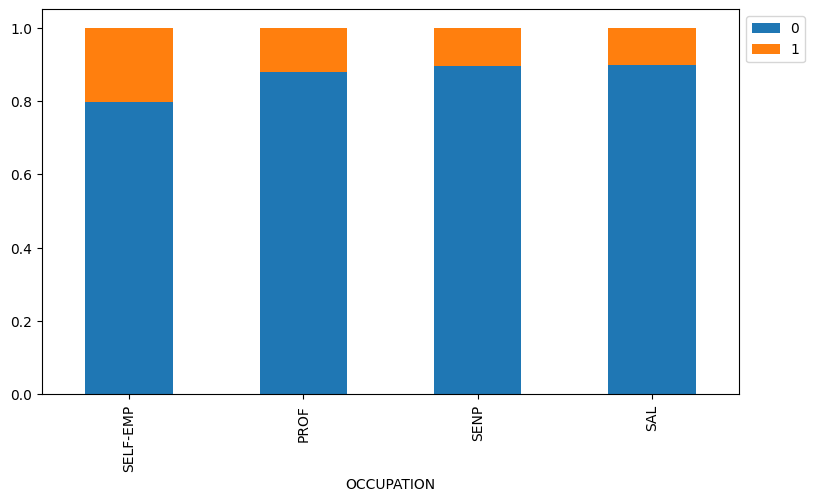

In [ ]:
stacked_barplot(data,"OCCUPATION","TARGET") ## Complete the code to plot stacked barplot for Target and Occupation

#### Target vs Acc_Type

TARGET        0     1    All
ACC_TYPE                    
All       17488  2512  20000
SA        13965  1794  15759
CA         3523   718   4241
------------------------------------------------------------------------------------------------------------------------


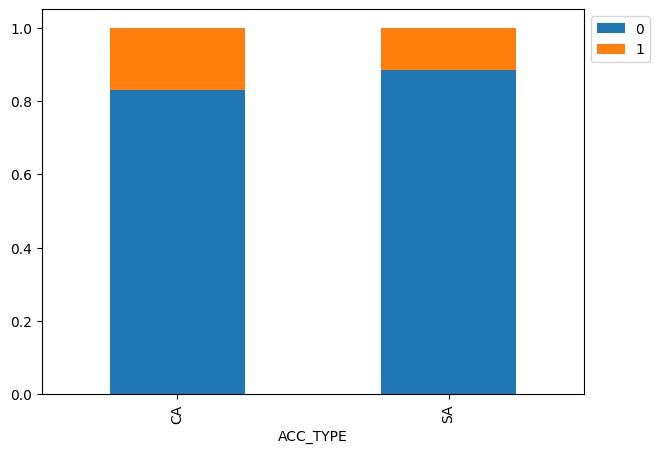

In [ ]:
stacked_barplot(data,"ACC_TYPE","TARGET") ## Complete the code to plot stacked barplot for Target and Acc_Type

#### Target vs FLG_HAS_CHGS

TARGET                0     1    All
FLG_HAS_ANY_CHGS                    
All               17488  2512  20000
0                 15649  2139  17788
1                  1839   373   2212
------------------------------------------------------------------------------------------------------------------------


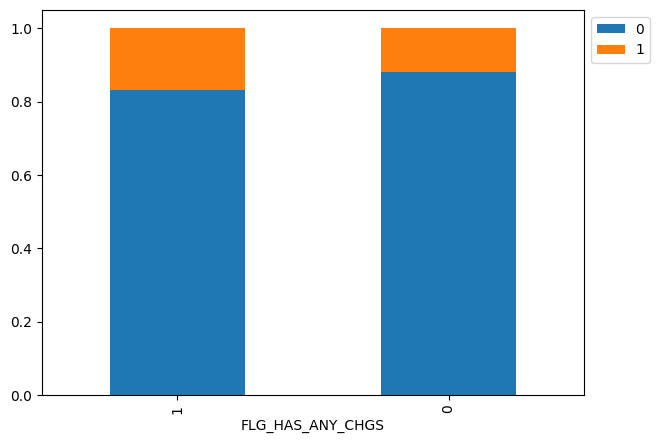

In [ ]:
stacked_barplot(data,"FLG_HAS_ANY_CHGS","TARGET") ## Complete the code to plot stacked barplot for Target and FLG_HAS_CHGS

#### Target vs FLG_HAS_NOMINEE

TARGET               0     1    All
FLG_HAS_NOMINEE                    
All              17488  2512  20000
1                15736  2287  18023
0                 1752   225   1977
------------------------------------------------------------------------------------------------------------------------


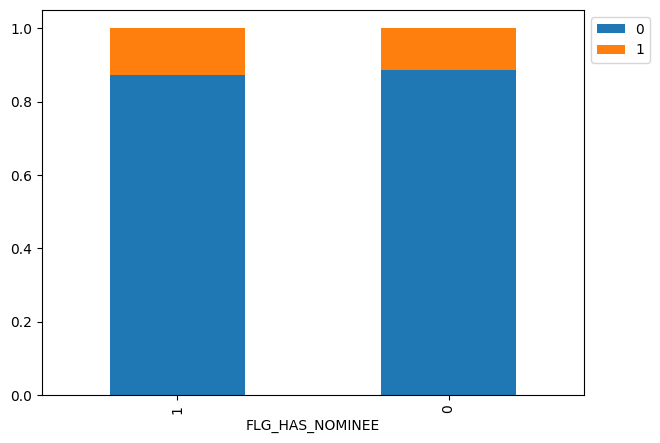

In [ ]:
stacked_barplot(data,"FLG_HAS_NOMINEE","TARGET") ## Complete the code to plot stacked barplot for Target and FLG_HAS_NOMINEE

#### Target vs FLG_HAS_CC

TARGET          0     1    All
FLG_HAS_CC                    
All         17488  2512  20000
0           12454  1438  13892
1            5034  1074   6108
------------------------------------------------------------------------------------------------------------------------


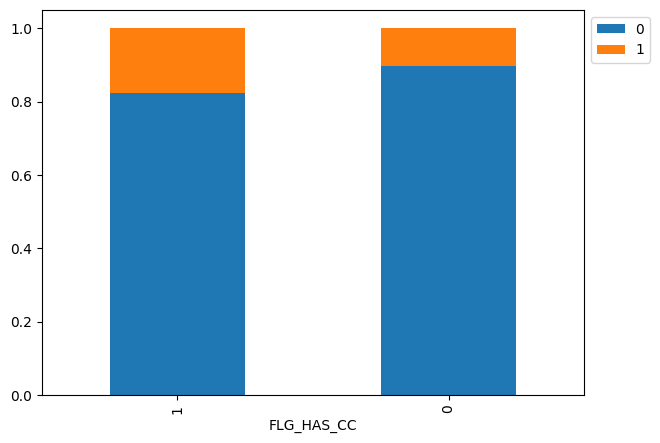

In [ ]:
stacked_barplot(data,"FLG_HAS_CC","TARGET") ## Complete the code to plot stacked barplot for Target and FLG_HAS_CC

#### Target vs FLG_HAS_OLD_LOAN

TARGET                0     1    All
FLG_HAS_OLD_LOAN                    
All               17488  2512  20000
0                  8829  1312  10141
1                  8659  1200   9859
------------------------------------------------------------------------------------------------------------------------


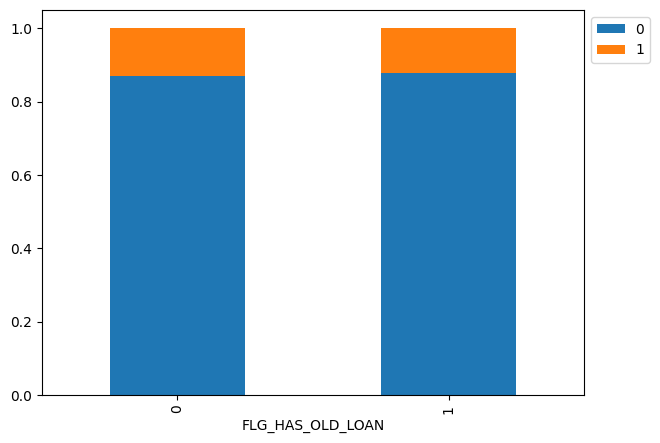

In [ ]:
stacked_barplot(data,"FLG_HAS_OLD_LOAN","TARGET") ## Complete the code to plot stacked barplot for Target and FLG_HAS_OLD_LOAN

#### Target vs AGE

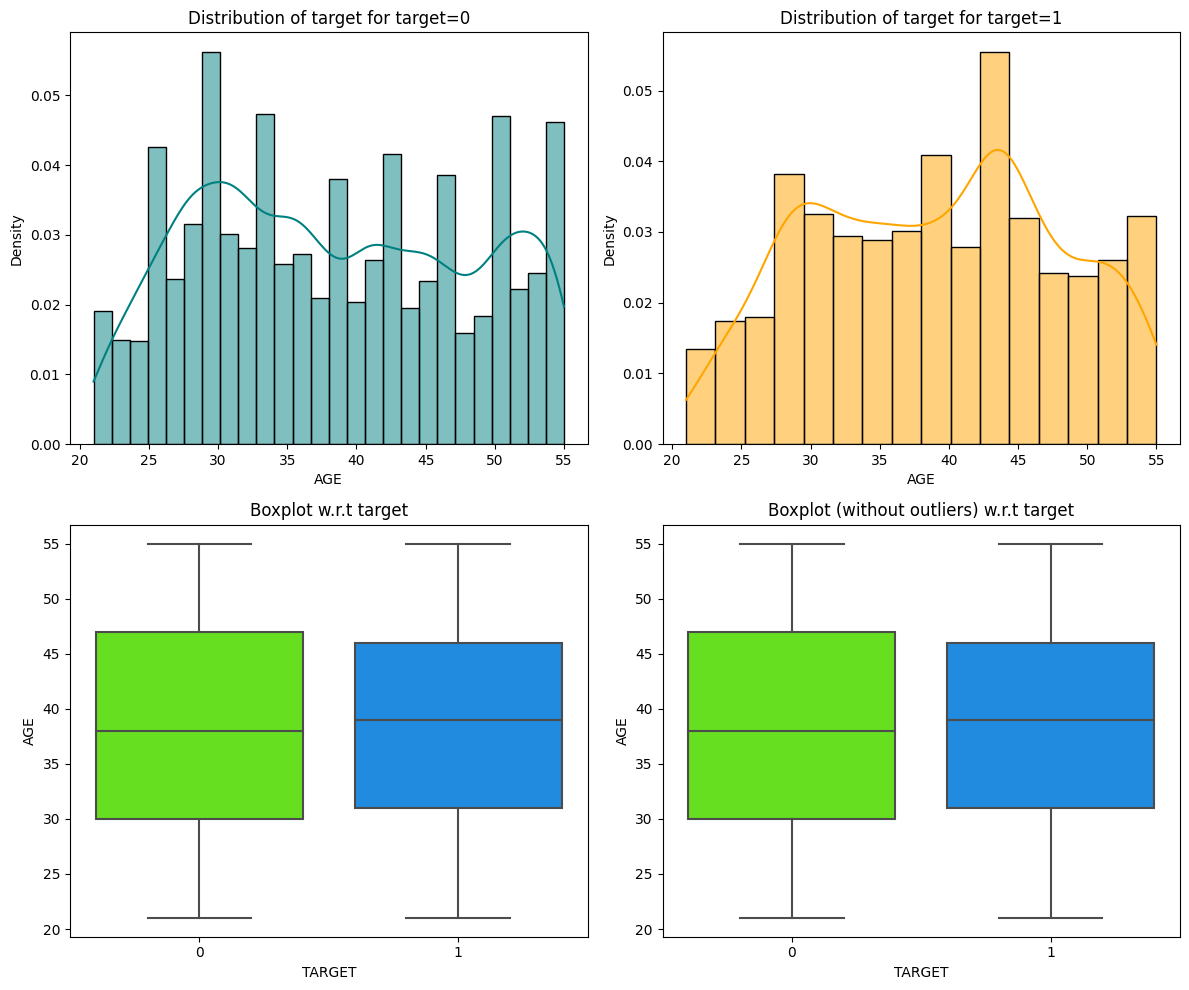

In [ ]:
distribution_plot_wrt_target(data, "AGE", "TARGET")

#### Target vs LEN_OF_RLTN_IN_MNTH

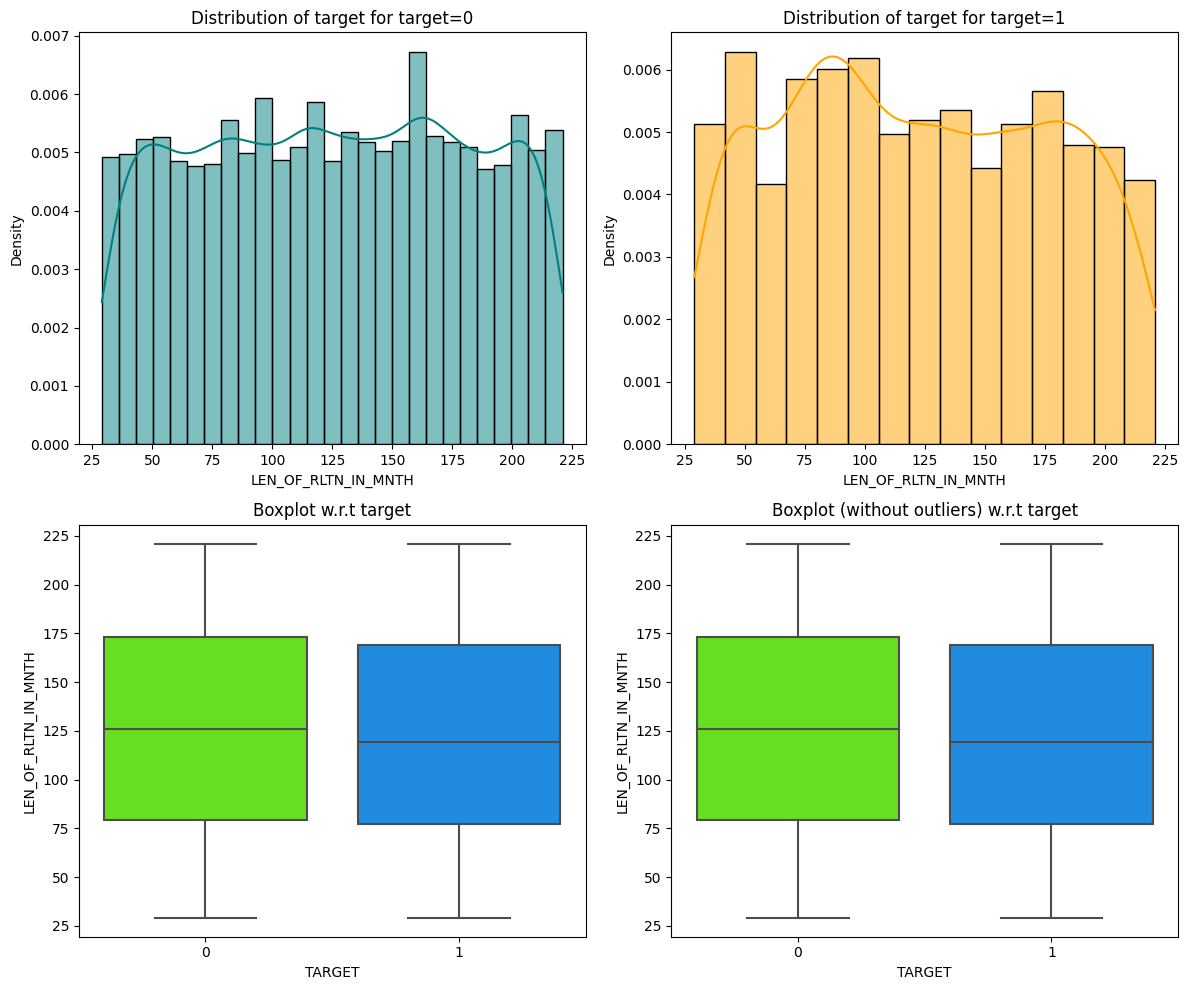

In [ ]:
distribution_plot_wrt_target(data,"LEN_OF_RLTN_IN_MNTH","TARGET") ## Complete the code to plot distribution barplot for Target Loan and LEN_OF_RLTN_IN_MNTH

#### Target vs NO_OF_L_DR_TXNS

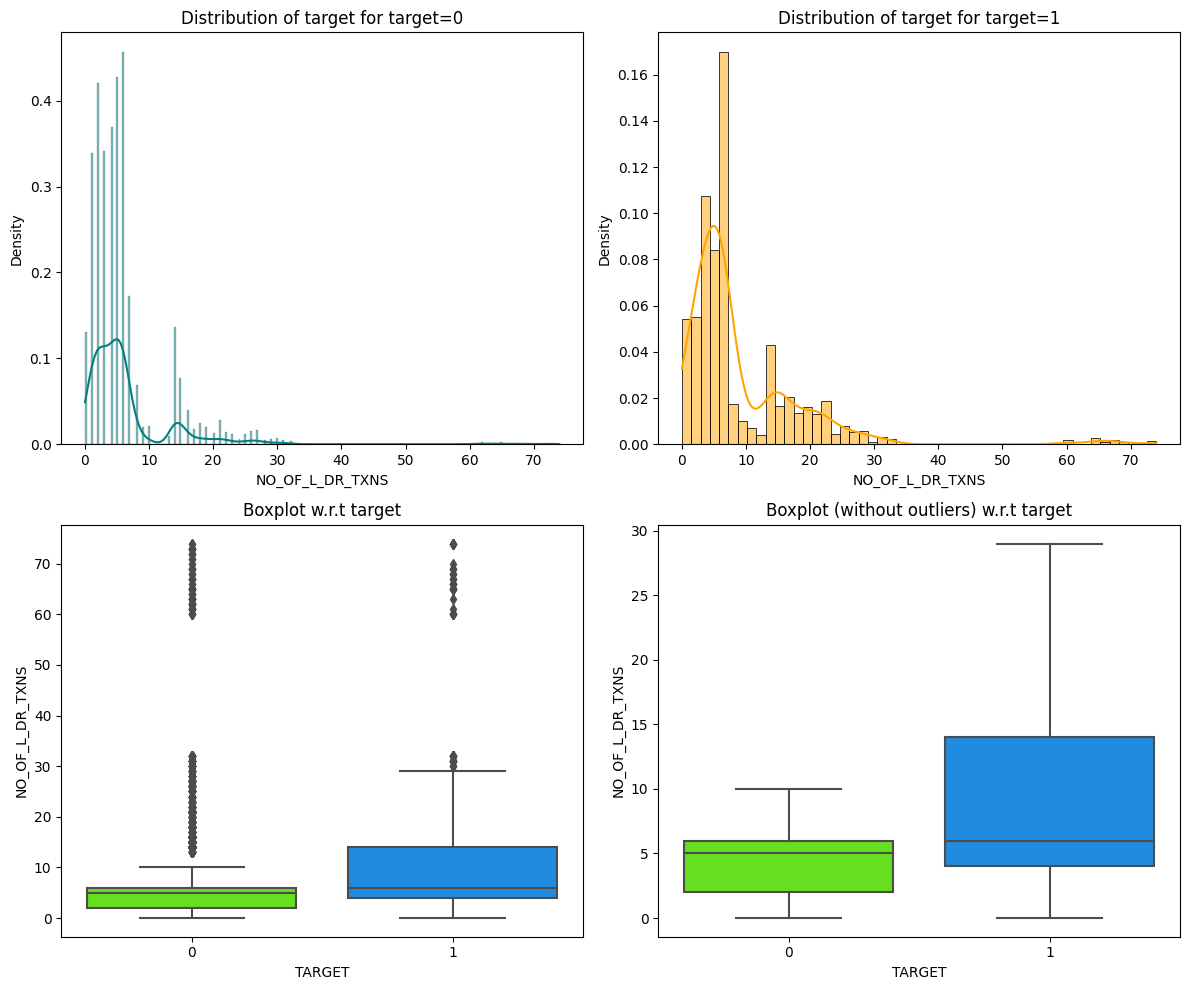

In [ ]:
distribution_plot_wrt_target(data,"NO_OF_L_DR_TXNS","TARGET") ## Complete the code to plot distribution barplot for Target Loan and NO_OF_L_DR_TXNS

NUMBER OF dr trans is high for non responsive people, where as people with low trxs are responsive

#### Target vs BALANCE

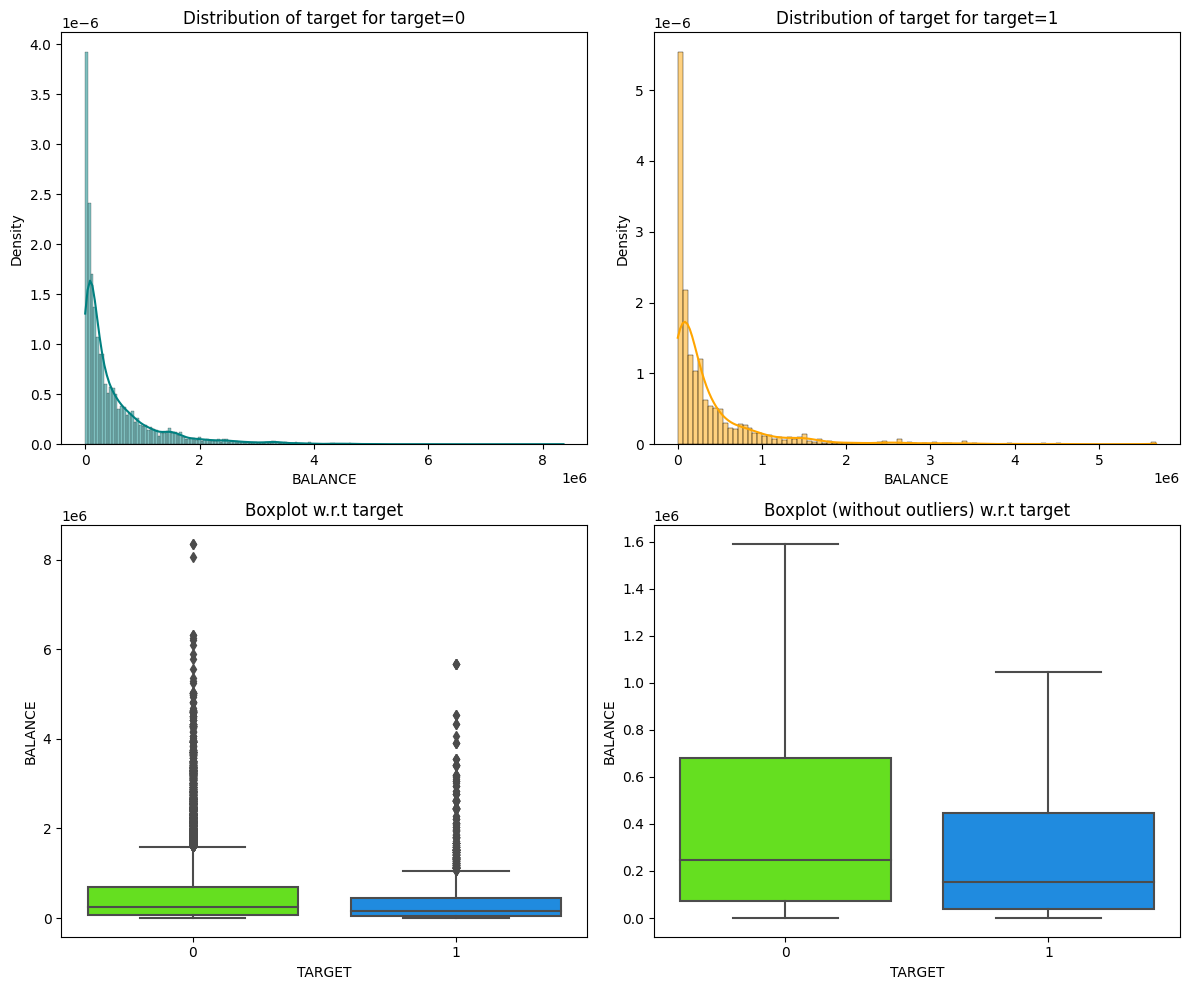

In [ ]:
distribution_plot_wrt_target(data,"BALANCE","TARGET") ## Complete the code to plot distribution barplot for Target Loan and Balance

#### Target vs SCR

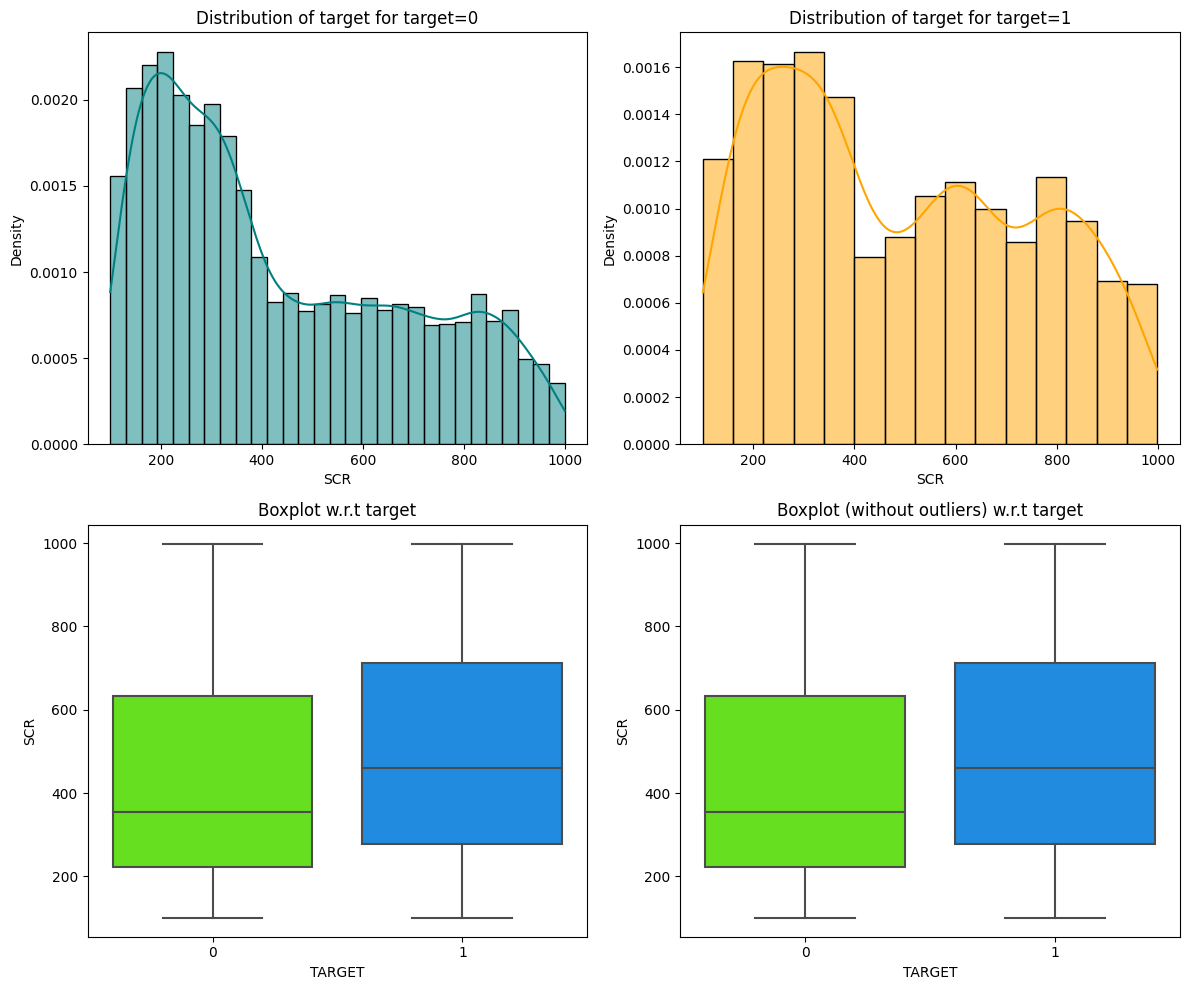

In [ ]:
distribution_plot_wrt_target(data,"SCR","TARGET") ## Complete the code to plot distribution barplot for Target Loan and SCR

#### Target vs NO_OF_L_CR_TXNS

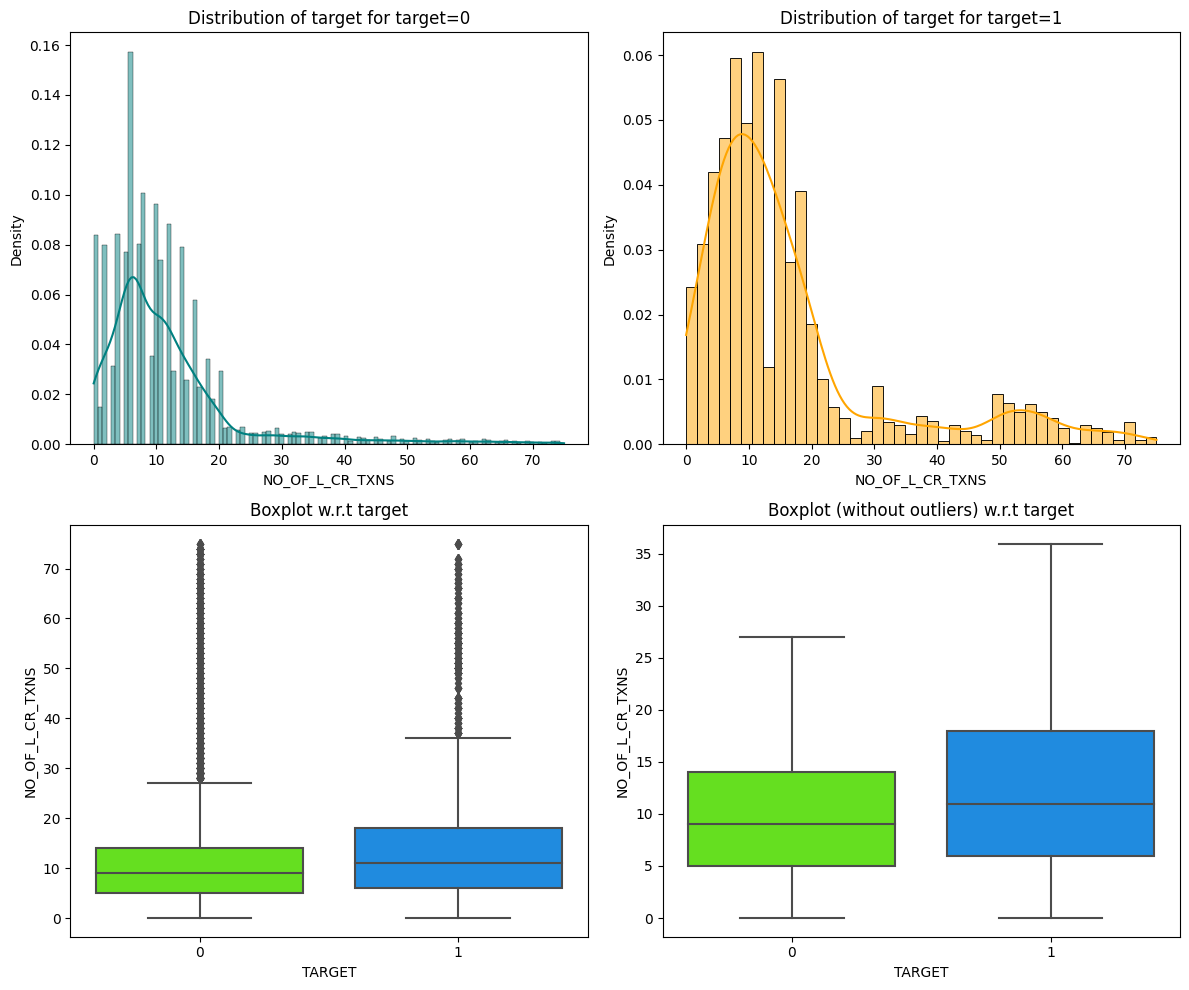

In [ ]:
distribution_plot_wrt_target(data,"NO_OF_L_CR_TXNS","TARGET") ## Complete the code to plot distribution barplot for Target Loan and NO_OF_L_CR_TXNS

#### Target vs AMT_OF_L_DR_TXNS

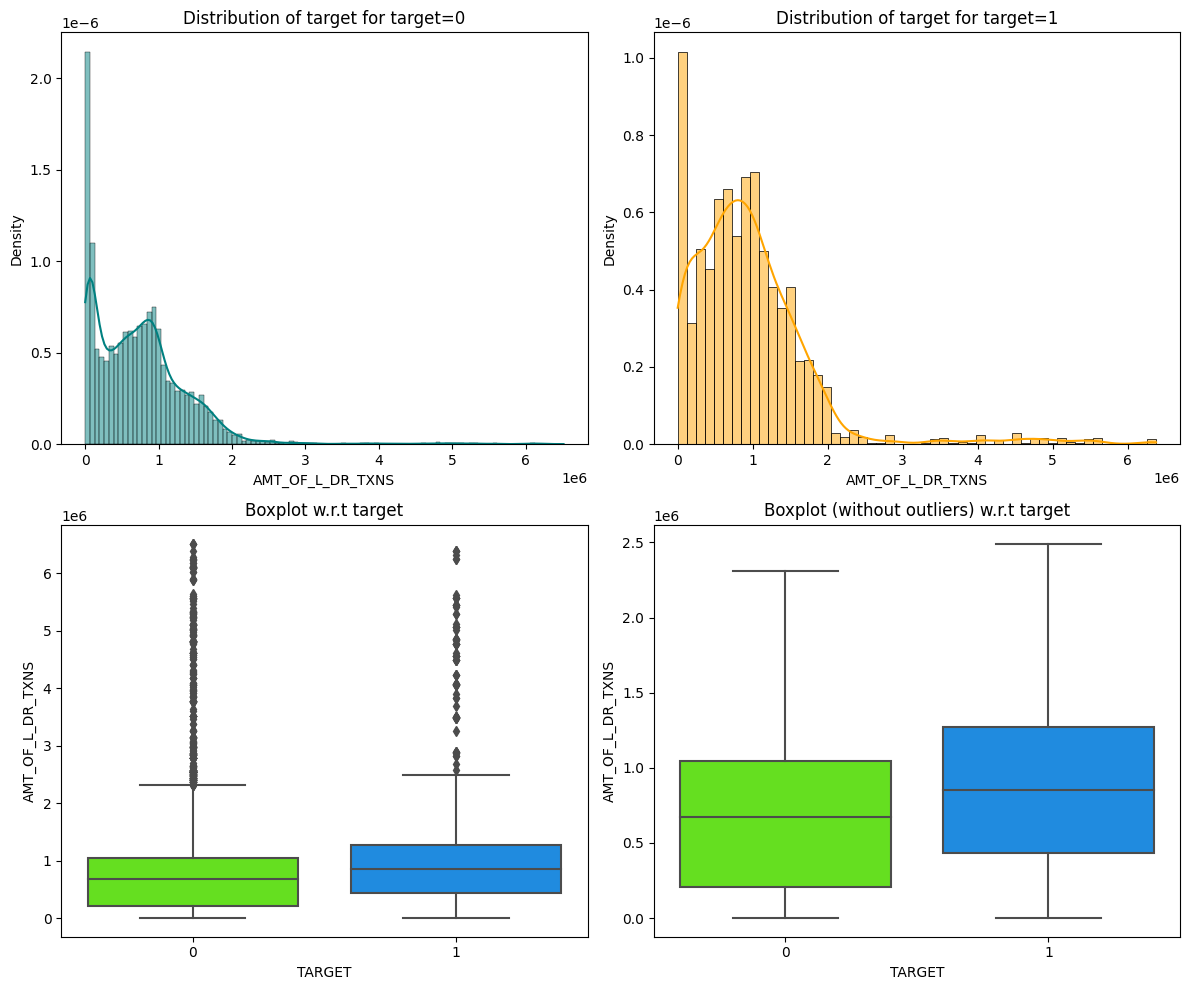

In [ ]:
distribution_plot_wrt_target(data,"AMT_OF_L_DR_TXNS","TARGET") ## Complete the code to plot distribution barplot for Target Loan and AMT_OF_L_DR_TXNS

## Data Preprocessing (contd.)

### Data Preparation for Modeling

- The objective is to predict whether a liability customer will buy personal loans.
- Before you proceed to build a model, you need to split the data into train, and test to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale numerical values.
- You will build a model using the train data and then check it's performance

In [ ]:
# Separate independent and dependent variable
X = data.drop(["TARGET"], axis=1)
Y = data["TARGET"]

In [ ]:
# Create a sample DataFrame
data = {
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 22],
    'height': [165.2, 180.5, 160.0],
    'is_student': [True, False, True]
}

df = pd.DataFrame(data)

# Select columns with numeric data types (integers and floats)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Select columns with boolean data type
boolean_columns = df.select_dtypes(include=['bool'])

print("Numeric Columns:")
print(numeric_columns)

print("\nBoolean Columns:")
print(boolean_columns)


Numeric Columns:
   age  height
0   25   165.2
1   30   180.5
2   22   160.0

Boolean Columns:
   is_student
0        True
1       False
2        True


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   AGE                  20000 non-null  int64   
 1   GENDER               20000 non-null  category
 2   BALANCE              20000 non-null  float64 
 3   OCCUPATION           20000 non-null  category
 4   SCR                  20000 non-null  int64   
 5   HOLDING_PERIOD       20000 non-null  int64   
 6   ACC_TYPE             20000 non-null  category
 7   LEN_OF_RLTN_IN_MNTH  20000 non-null  int64   
 8   NO_OF_L_CR_TXNS      20000 non-null  int64   
 9   FLG_HAS_CC           20000 non-null  category
 10  FLG_HAS_ANY_CHGS     20000 non-null  category
 11  FLG_HAS_NOMINEE      20000 non-null  category
 12  FLG_HAS_OLD_LOAN     20000 non-null  category
 13  ACC_OP_Month         20000 non-null  int64   
 14  NO_OF_L_DR_TXNS      20000 non-null  int64   
 15  AMT_OF_L_DR_TXNS   

In [ ]:
objcols=X.select_dtypes(include='category').columns
print(objcols)

Index(['GENDER', 'OCCUPATION', 'ACC_TYPE', 'FLG_HAS_CC', 'FLG_HAS_ANY_CHGS',
       'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN'],
      dtype='object')


In [ ]:
X = pd.get_dummies(X, columns=objcols, drop_first=True)

In [ ]:
X.head(5)
X.shape

(20000, 19)

In [ ]:
# Complete the code to apply dummies on Gender, Occupation and ACC_TYPE



# Complete the code to split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)     # Complete the code to get the shape of train data
print("Shape of test set : ", X_test.shape)           # Complete the code to get the shape of test data
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))              # Complete the code to get the value counts of y train data
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))           # Complete the code to get the value counts of y test data

Shape of Training set :  (14000, 19)
Shape of test set :  (6000, 19)
Percentage of classes in training set:
0    0.873357
1    0.126643
Name: TARGET, dtype: float64
Percentage of classes in test set:
0    0.876833
1    0.123167
Name: TARGET, dtype: float64


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer will take the personal loan but in reality the customer will not take the personal loan - Loss of resources
2. Predicting a customer will not take the personal loan but in reality the customer was going to take the personal loan - Loss of opportunity

**Which case is more important?**
* Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to take the personal loan.

**How to reduce this loss i.e need to reduce False Negatives?**

* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

### Model Building: Logistic Regression

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models.
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Logistic Regression Model

In [ ]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)

## Complete the code to Fit the logistic Regression model on X_train and y_train
model = lg.fit(X_train,y_train)

#### Checking model performance on the training data

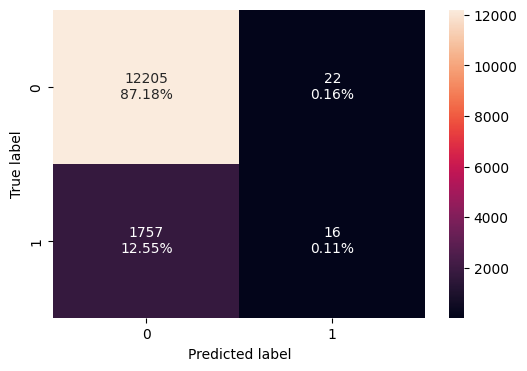

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [ ]:
# Model Performance on train
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(lg, X_train, y_train)
print('lg coef {}'.format(lg.coef_))
f=pd.DataFrame(lg.coef_,columns=X_train.columns)
print(f)
print("Training performance:"
)
log_reg_model_train_perf

lg coef [[-1.74760988e-02 -3.93926577e-07  4.80915350e-04 -5.76917782e-02
  -3.74160131e-03  2.27636059e-02 -2.45577620e-02 -8.86598789e-03
   6.55703610e-08  1.31088743e-02 -3.64714204e-03 -1.41042106e-01
   1.68974478e-01 -6.32720707e-02 -8.36214009e-02  1.96615849e-01
   1.77090922e-02 -5.44374370e-02 -7.20342952e-02]]
        AGE       BALANCE       SCR  HOLDING_PERIOD  LEN_OF_RLTN_IN_MNTH  \
0 -0.017476 -3.939266e-07  0.000481       -0.057692            -0.003742   

   NO_OF_L_CR_TXNS  ACC_OP_Month  NO_OF_L_DR_TXNS  AMT_OF_L_DR_TXNS  GENDER_M  \
0         0.022764     -0.024558        -0.008866      6.557036e-08  0.013109   

   GENDER_O  OCCUPATION_SAL  OCCUPATION_SELF-EMP  OCCUPATION_SENP  \
0 -0.003647       -0.141042             0.168974        -0.063272   

   ACC_TYPE_SA  FLG_HAS_CC_1  FLG_HAS_ANY_CHGS_1  FLG_HAS_NOMINEE_1  \
0    -0.083621      0.196616            0.017709          -0.054437   

   FLG_HAS_OLD_LOAN_1  
0           -0.072034  
Training performance:


Accuracy    Recall  Precision       F1
0  0.872929  0.009024   0.421053  0.01767

#### Checking model performance on the test data

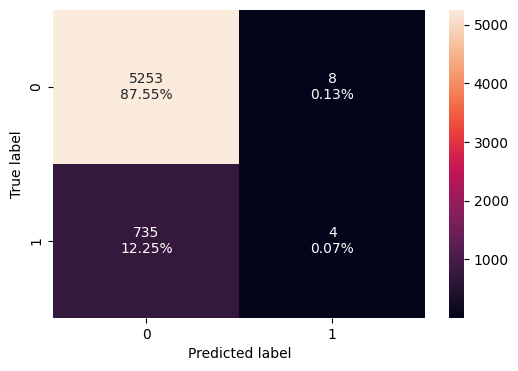

In [ ]:
# complete the code to create confusion matrix on test dat
confusion_matrix_sklearn_with_threshold(lg,X_test,y_test)

In [ ]:
# Complete the code to get the model performance on the test data
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(lg,X_test,y_test)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.876167  0.005413   0.333333  0.010652

### Model Performance Improvement: Logistic Regression

#### ROC-AUC

* The area under the ROC curve (AUC) is a measure of how good a model is - The higher the AUC, the better the model is, at distinguishing between classes.

**ROC-AUC on training set**

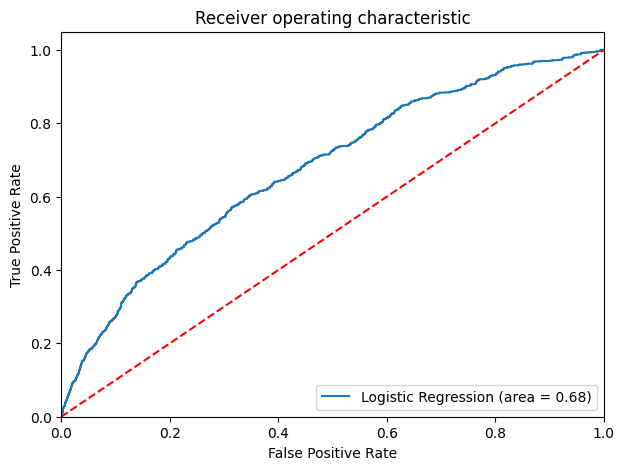

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Optimal threshold using AUC-ROC curve**

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
print('fpr {},tpr {},thresholds {}'.format(fpr,tpr,thresholds))
print('fpr-tpr {}'.format(tpr-fpr))
print('fpr length {}, tpr length {} y train size {}'.format(fpr.size,tpr.size,y_train.size))
optimal_idx = np.argmax(tpr - fpr)
print('optima idx {}'.format(optimal_idx))
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

fpr [0.         0.         0.         ... 0.99959107 0.99975464 1.        ],tpr [0.         0.00112803 0.00225606 ... 1.         1.         1.        ],thresholds [1.6915619  0.6915619  0.60309329 ... 0.00896136 0.00884174 0.00341821]
fpr-tpr [0.         0.00112803 0.00225606 ... 0.00040893 0.00024536 0.        ]
fpr length 5572, tpr length 5572 y train size 14000
optima idx 2108
0.14607429578791317


**Checking model performance on the training data**

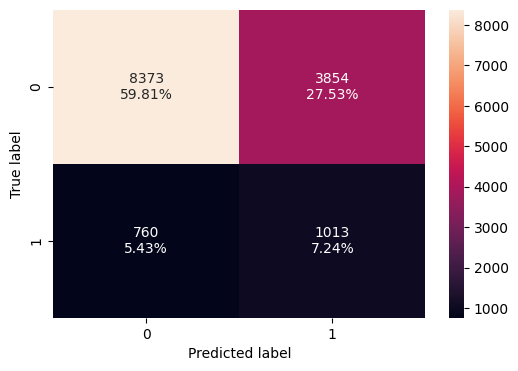

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision       F1
0  0.670429  0.571348   0.208136  0.30512

**Use the above threshold and apply on test data**

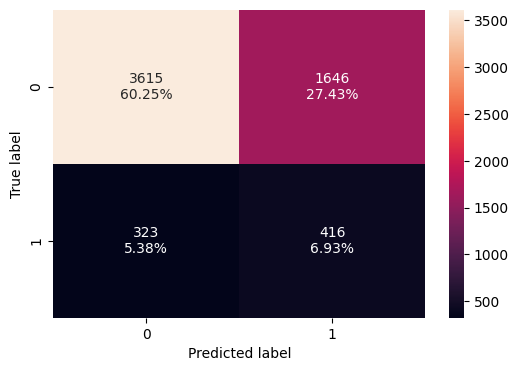

In [ ]:
# Complete the code to create confusion matrix with threshold value on test data
confusion_matrix_sklearn_with_threshold(lg,X_test,y_test,threshold=optimal_threshold_auc_roc)

In [ ]:
# Complete the code to checke the model performance on test data using the treshold value
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(lg,X_test,y_test,threshold=optimal_threshold_auc_roc)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0  0.671833  0.562923   0.201746  0.297037

#### Precision-Recall Curve

**Let's use Precision-Recall curve and see if we can find a better threshold**

* The Precision-Recall curve shows the tradeoff between Precision and Recall for different thresholds. It can be used to select optimal threshold as required to improve the model improvement.

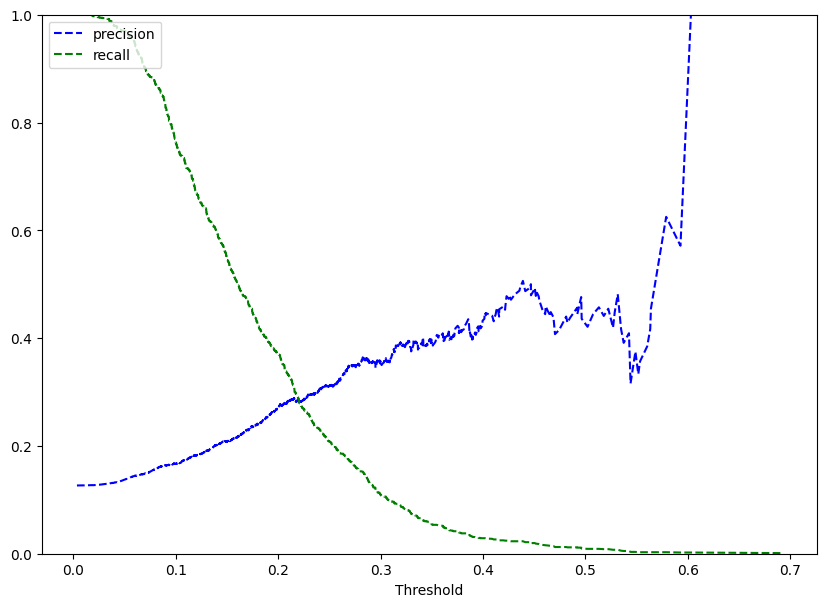

In [ ]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
# Complete the code to set the threshold by looking into above curve
optimal_threshold_curve = 0.1

**Checking model performance on training data**

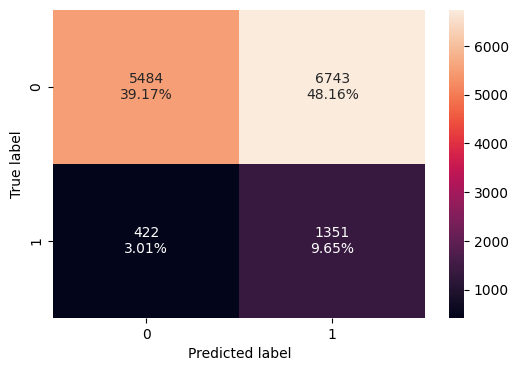

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.488214  0.761985   0.166914  0.273842

**Let's check the performance on the test data**

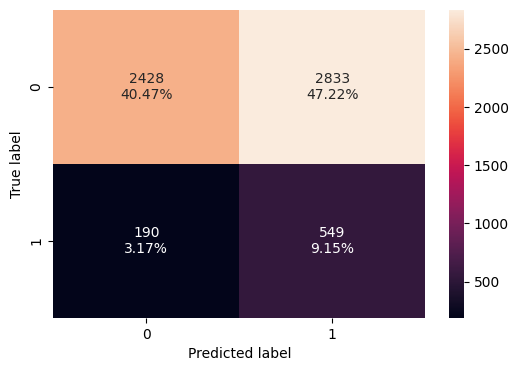

In [ ]:
# Complete the code to create the confusion matrix on test data using the above threshold value
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test, threshold=optimal_threshold_curve)

In [ ]:
# Complete the code to get the model performance on the test data using the above threshold value
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(lg, X_test, y_test, threshold=optimal_threshold_curve)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision       F1
0  0.496167  0.742896    0.16233  0.26644

### Model Performance Comparison: Logistic Regression

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.13 Threshold",
    "Logistic Regression-0.2 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.13 Threshold  \
Accuracy                      0.872929                            0.670429   
Recall                        0.009024                            0.571348   
Precision                     0.421053                            0.208136   
F1                            0.017670                            0.305120   

           Logistic Regression-0.2 Threshold  
Accuracy                            0.488214  
Recall                              0.761985  
Precision                           0.166914  
F1                                  0.273842

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.13 Threshold",
    "Logistic Regression-0.2 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.13 Threshold  \
Accuracy                      0.876167                            0.671833   
Recall                        0.005413                            0.562923   
Precision                     0.333333                            0.201746   
F1                            0.010652                            0.297037   

           Logistic Regression-0.2 Threshold  
Accuracy                            0.496167  
Recall                              0.742896  
Precision                           0.162330  
F1                                  0.266440

**Observations**

*

### Model Building: Decision Tree

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Decision Tree Model

In [ ]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train,y_train)  ## Complete the code to fit decision tree on train data

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training data

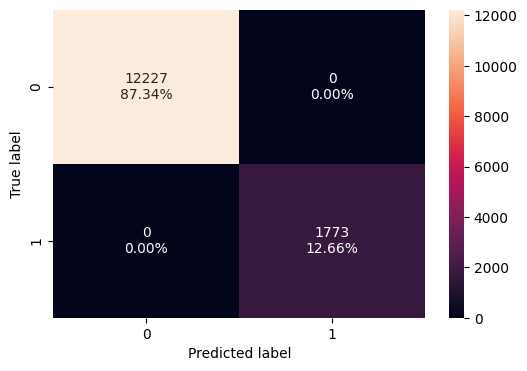

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#### Visualizing the Decision Tree

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'ACC_OP_Month', 'NO_OF_L_DR_TXNS', 'AMT_OF_L_DR_TXNS', 'GENDER_M', 'GENDER_O', 'OCCUPATION_SAL', 'OCCUPATION_SELF-EMP', 'OCCUPATION_SENP', 'ACC_TYPE_SA', 'FLG_HAS_CC_1', 'FLG_HAS_ANY_CHGS_1', 'FLG_HAS_NOMINEE_1', 'FLG_HAS_OLD_LOAN_1']


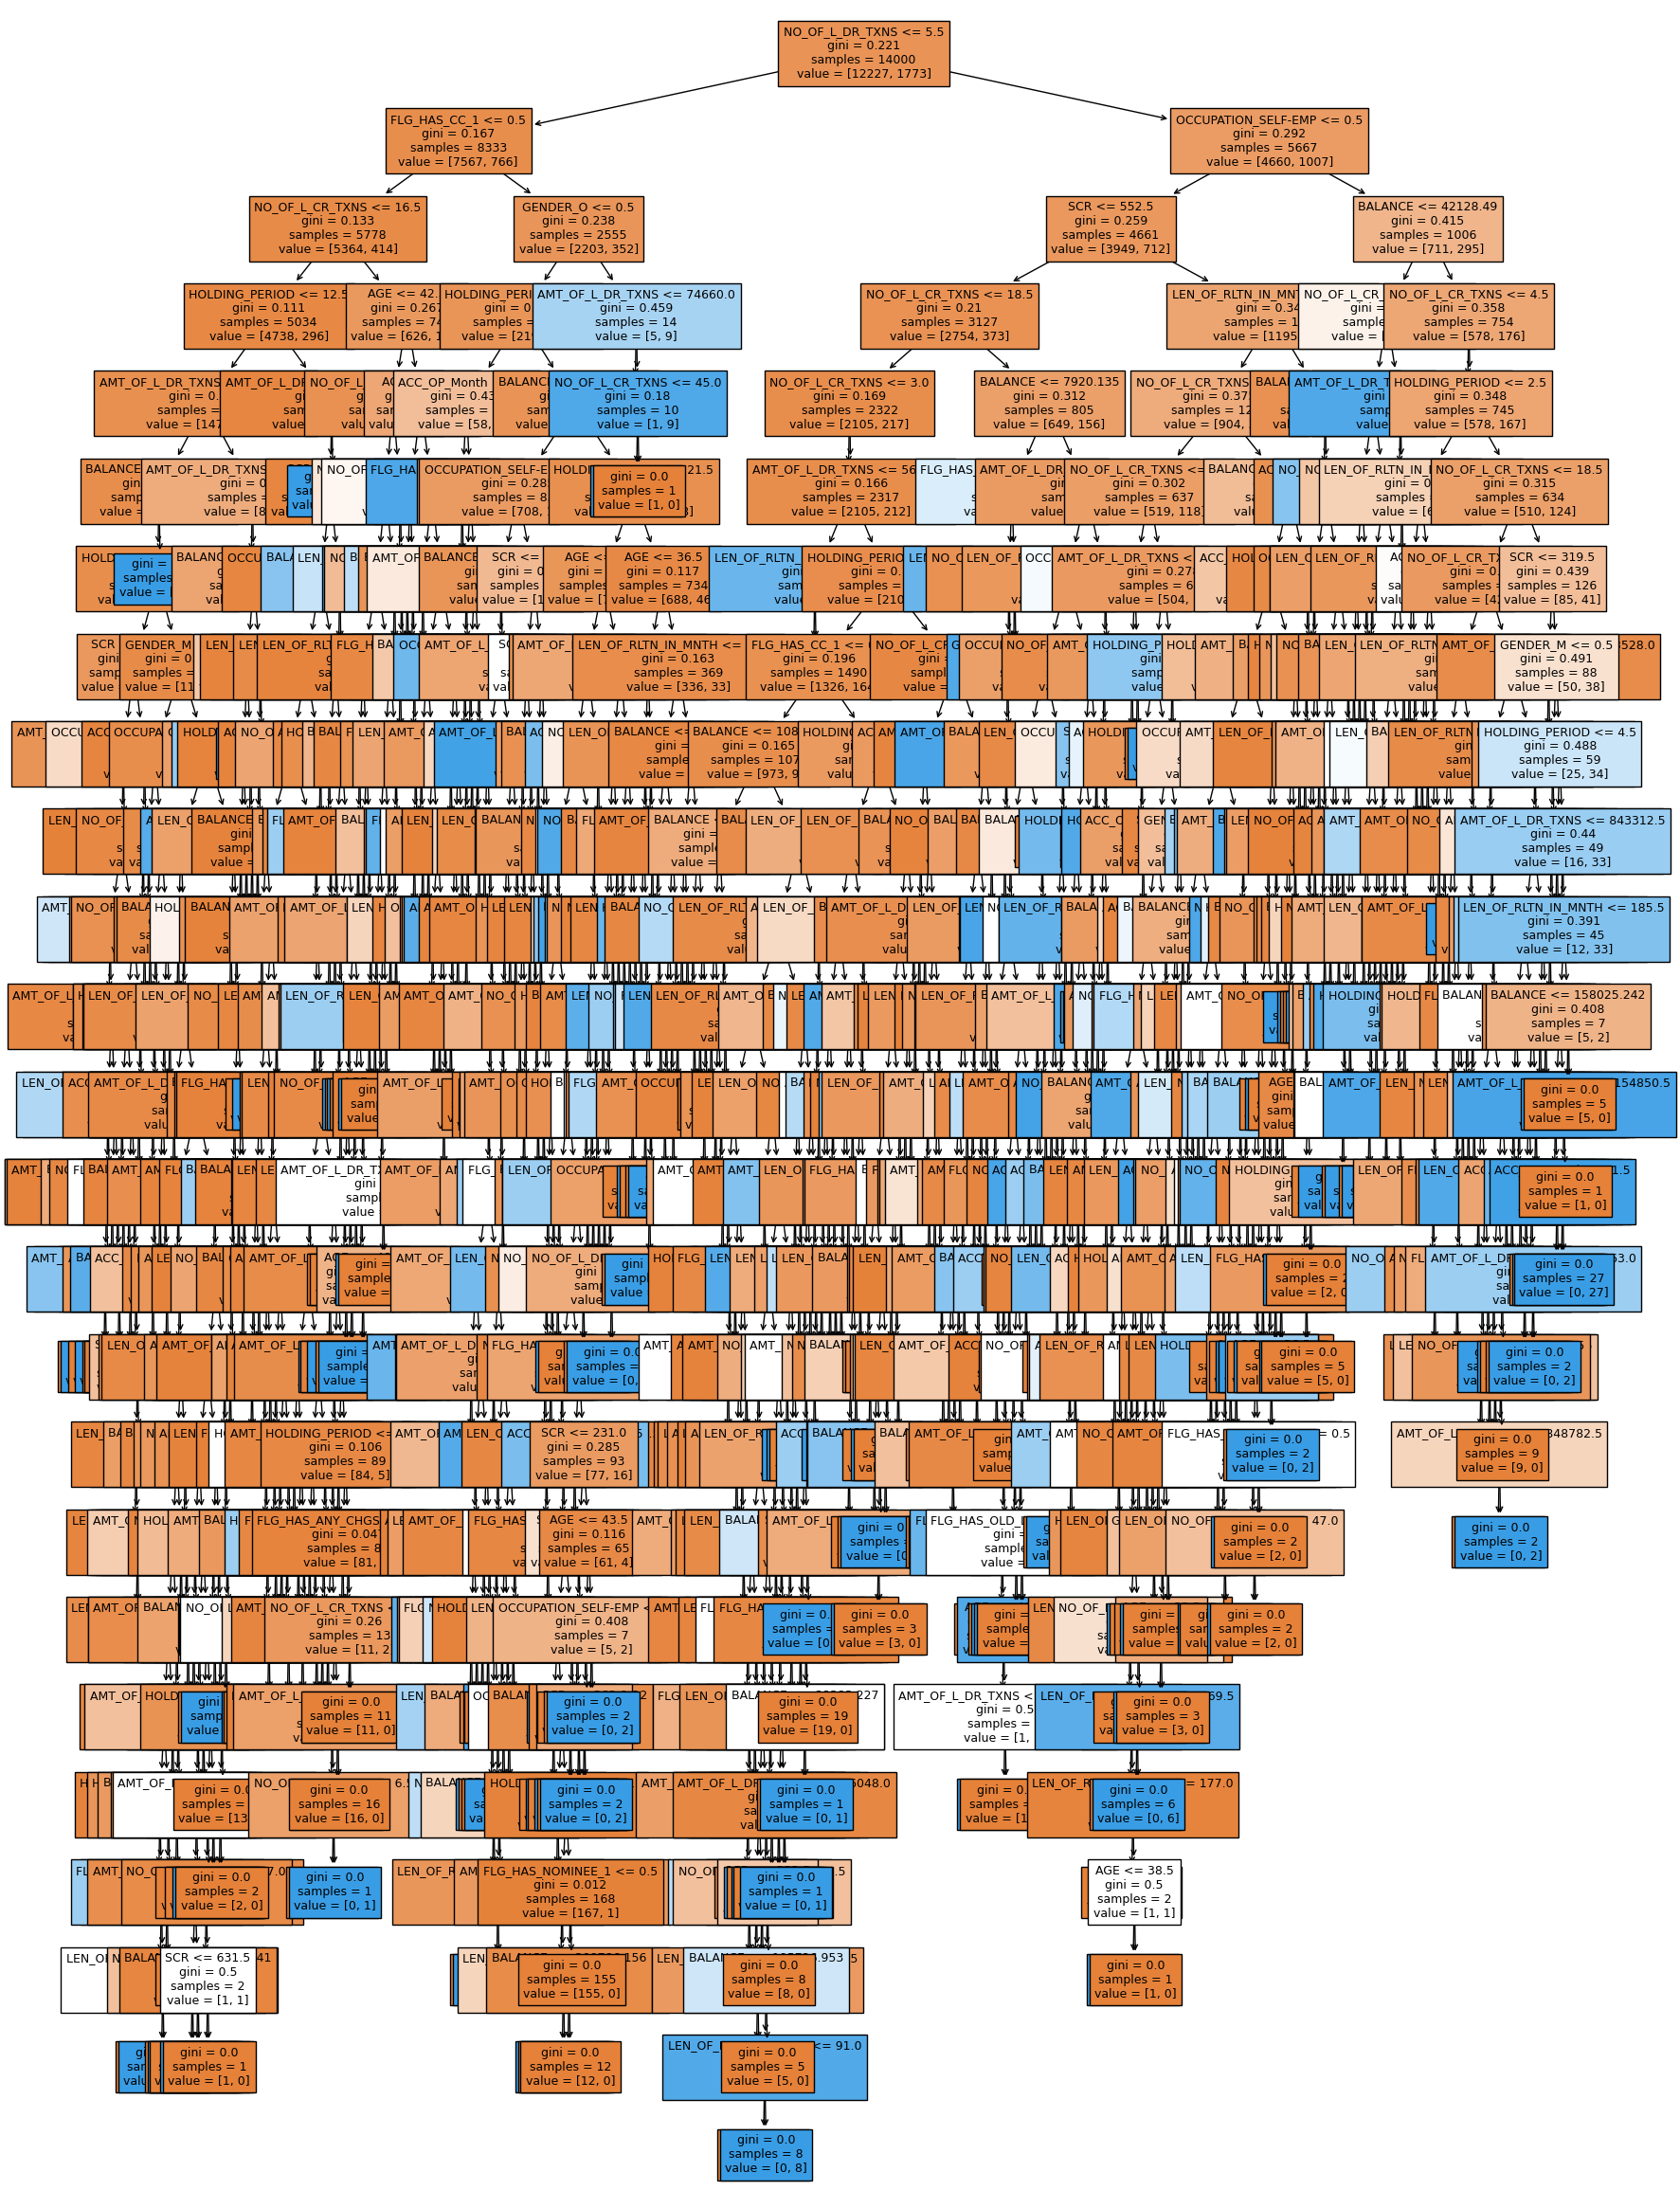

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- NO_OF_L_DR_TXNS <= 5.50
|   |--- FLG_HAS_CC_1 <= 0.50
|   |   |--- NO_OF_L_CR_TXNS <= 16.50
|   |   |   |--- HOLDING_PERIOD <= 12.50
|   |   |   |   |--- AMT_OF_L_DR_TXNS <= 1452590.50
|   |   |   |   |   |--- BALANCE <= 5235393.50
|   |   |   |   |   |   |--- HOLDING_PERIOD <= 2.50
|   |   |   |   |   |   |   |--- SCR <= 901.50
|   |   |   |   |   |   |   |   |--- AMT_OF_L_DR_TXNS <= 1410878.50
|   |   |   |   |   |   |   |   |   |--- SCR <= 430.50
|   |   |   |   |   |   |   |   |   |   |--- BALANCE <= 7064.70
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- BALANCE >  7064.70
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- SCR >  430.50
|   |   |   |   |   |   |   |   |   |   |--- NO_OF_L_CR_TXNS <= 7.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- NO_OF_L_CR

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print('feat {}'.format(model.feature_importances_))
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

feat [0.09498931 0.15548436 0.13572131 0.07388261 0.09181346 0.09708906
 0.06827703 0.04739573 0.11276053 0.01506252 0.00482859 0.00958155
 0.01820708 0.01258263 0.01101194 0.01272935 0.01677032 0.00734177
 0.01447085]
                          Imp
BALANCE              0.155484
SCR                  0.135721
AMT_OF_L_DR_TXNS     0.112761
NO_OF_L_CR_TXNS      0.097089
AGE                  0.094989
LEN_OF_RLTN_IN_MNTH  0.091813
HOLDING_PERIOD       0.073883
ACC_OP_Month         0.068277
NO_OF_L_DR_TXNS      0.047396
OCCUPATION_SELF-EMP  0.018207
FLG_HAS_ANY_CHGS_1   0.016770
GENDER_M             0.015063
FLG_HAS_OLD_LOAN_1   0.014471
FLG_HAS_CC_1         0.012729
OCCUPATION_SENP      0.012583
ACC_TYPE_SA          0.011012
OCCUPATION_SAL       0.009582
FLG_HAS_NOMINEE_1    0.007342
GENDER_O             0.004829


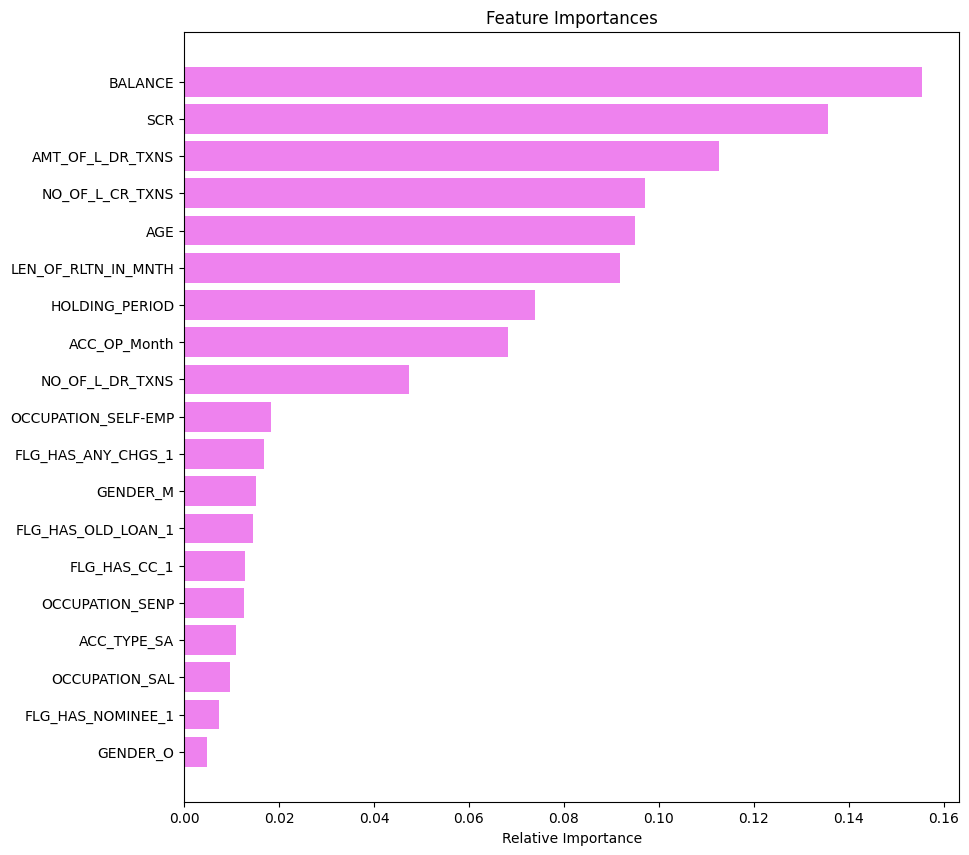

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Checking model performance on test data

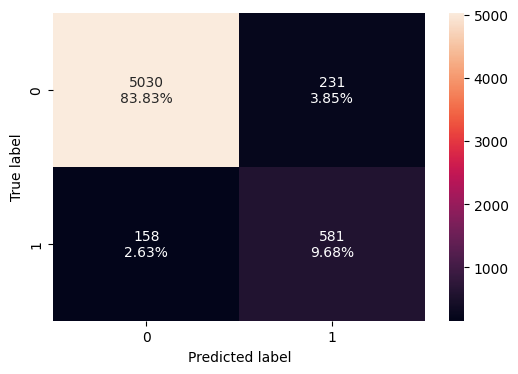

In [ ]:
confusion_matrix_sklearn(model,X_test,y_test)  # Complete the code to get the confusion matrix for test data

In [ ]:
# Complete the code to get the model formance on test data
decision_tree_perf_test = model_performance_classification_sklearn(model,X_test,y_test)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.935167  0.786198   0.715517  0.749194

### Model Performance Improvement: Decision Tree

#### Pre-Pruning

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={1: 0.87, 0: 0.13})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, 20, None],
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [1, 2, 5, 7, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit(X_train,y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(class_weight={0: 0.13, 1: 0.87}, max_depth=15,
                       min_samples_leaf=5, random_state=1)

**Checking performance on training data**

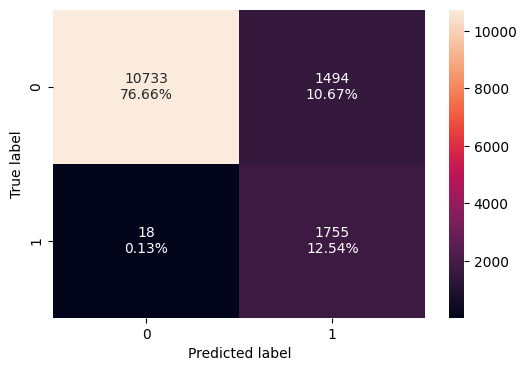

In [ ]:
confusion_matrix_sklearn(estimator,X_train,y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator,X_train,y_train) ## Comodelmplete the code to check performance on train data
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0     0.892  0.989848   0.540166  0.698925

**Visualizing the Decision Tree**

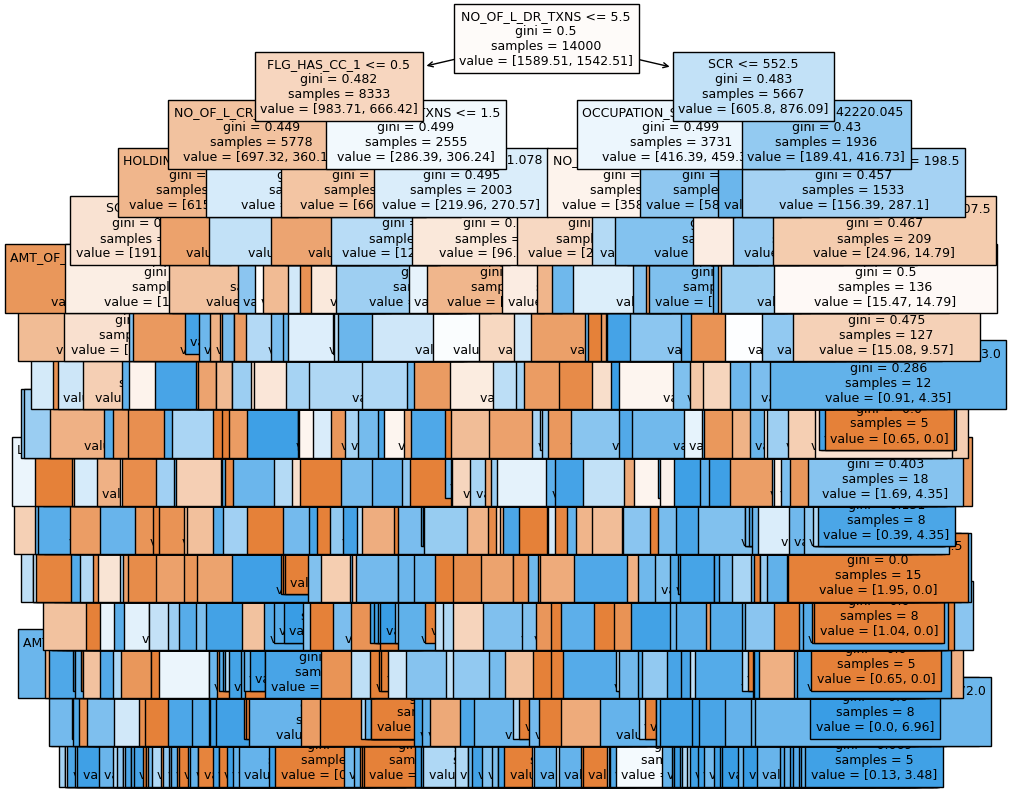

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- NO_OF_L_DR_TXNS <= 5.50
|   |--- FLG_HAS_CC_1 <= 0.50
|   |   |--- NO_OF_L_CR_TXNS <= 16.50
|   |   |   |--- HOLDING_PERIOD <= 12.50
|   |   |   |   |--- SCR <= 172.00
|   |   |   |   |   |--- AMT_OF_L_DR_TXNS <= 709086.50
|   |   |   |   |   |   |--- weights: [15.86, 0.00] class: 0
|   |   |   |   |   |--- AMT_OF_L_DR_TXNS >  709086.50
|   |   |   |   |   |   |--- FLG_HAS_OLD_LOAN_1 <= 0.50
|   |   |   |   |   |   |   |--- HOLDING_PERIOD <= 4.50
|   |   |   |   |   |   |   |   |--- weights: [1.43, 0.00] class: 0
|   |   |   |   |   |   |   |--- HOLDING_PERIOD >  4.50
|   |   |   |   |   |   |   |   |--- FLG_HAS_NOMINEE_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.65, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- FLG_HAS_NOMINEE_1 >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.65, 3.48] class: 1
|   |   |   |   |   |   |--- FLG_HAS_OLD_LOAN_1 >  0.50
|   |   |   |   |   |   |   |--- SCR <= 108.50
|   |   |   |   |   |   |   |   |--- weights: [

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                          Imp
SCR                  0.133108
BALANCE              0.115694
LEN_OF_RLTN_IN_MNTH  0.110473
HOLDING_PERIOD       0.107469
AMT_OF_L_DR_TXNS     0.099849
NO_OF_L_CR_TXNS      0.094997
AGE                  0.086828
NO_OF_L_DR_TXNS      0.077916
ACC_OP_Month         0.051779
OCCUPATION_SELF-EMP  0.025491
FLG_HAS_CC_1         0.022572
OCCUPATION_SAL       0.016618
ACC_TYPE_SA          0.013840
OCCUPATION_SENP      0.010538
FLG_HAS_OLD_LOAN_1   0.010225
GENDER_M             0.008214
FLG_HAS_ANY_CHGS_1   0.006989
FLG_HAS_NOMINEE_1    0.005689
GENDER_O             0.001712


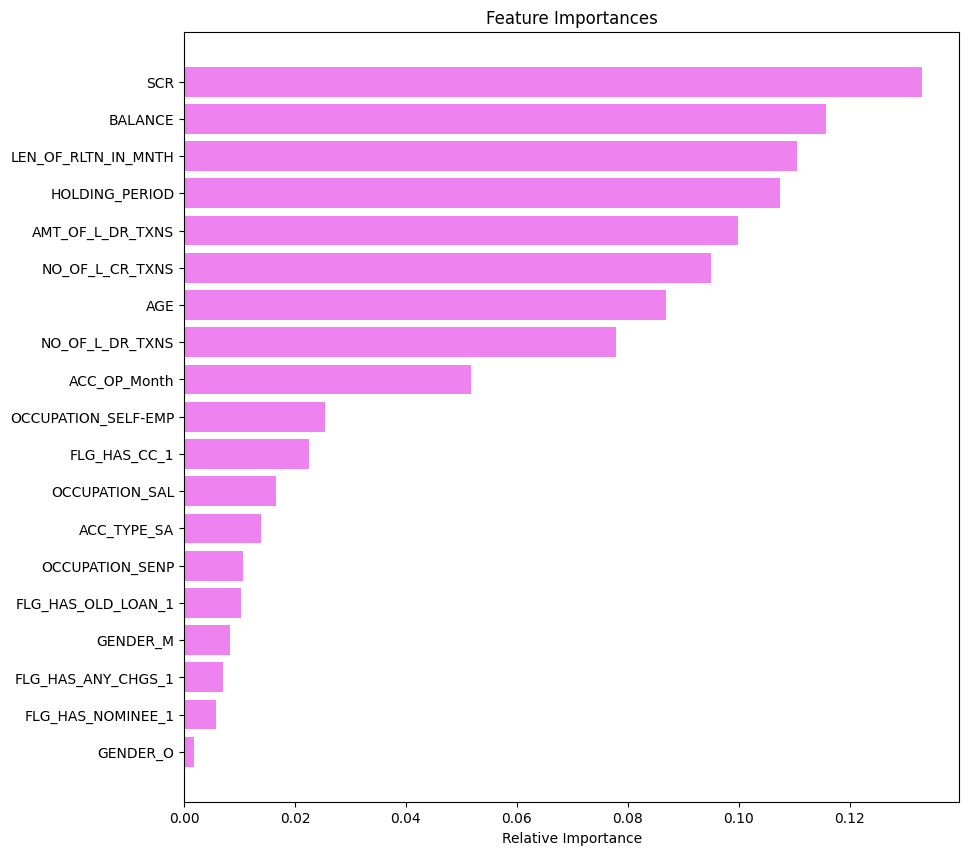

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

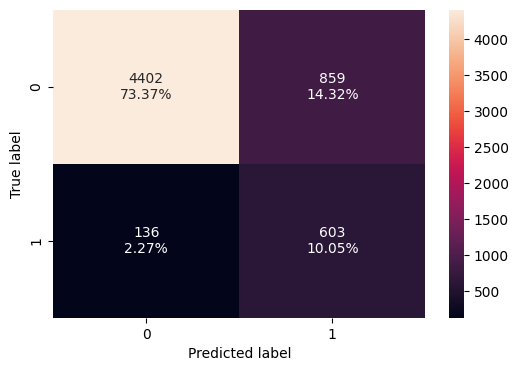

In [ ]:
confusion_matrix_sklearn(estimator,X_test,y_test)  # Complete the code to get the confusion matrix on test data

In [ ]:
# Complete the code to get the model performance on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator,X_test,y_test)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.834167  0.815968   0.412449  0.547933

#### Cost-Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 13, 1: 0.87})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print('path {}'.format(path.ccp_alphas.size))

path 420


In [ ]:
print('path {}'.format(path.impurities.size))
print('xtrain size {}'.format(X_train.shape))

path 420
xtrain size (14000, 19)


In [ ]:
df=pd.DataFrame(path)
print(df)

       ccp_alphas    impurities
0    0.000000e+00 -8.924578e-17
1    3.610965e-21 -8.924217e-17
2    3.610965e-21 -8.923856e-17
3    7.221930e-21 -8.923133e-17
4    7.221930e-21 -8.922411e-17
..            ...           ...
415  4.223562e-05  1.847404e-02
416  4.225615e-05  1.851629e-02
417  4.979532e-05  1.856609e-02
418  8.142328e-05  1.881036e-02
419  1.134920e-04  1.903734e-02

[420 rows x 2 columns]


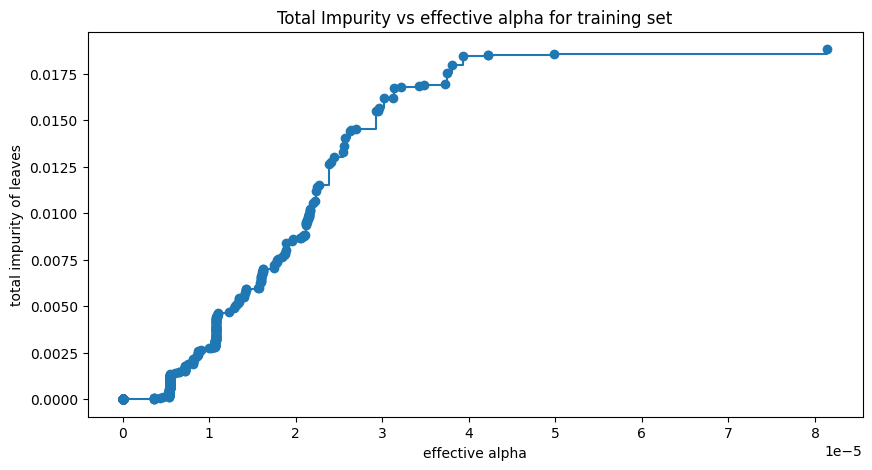

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with only one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.13, 1: 0.87}
    )
    clf.fit(X_train,y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1793 with ccp_alpha: 0.00011349196380861654


In [ ]:
print('clf size {}'.format(len(clfs)))

clf size 420


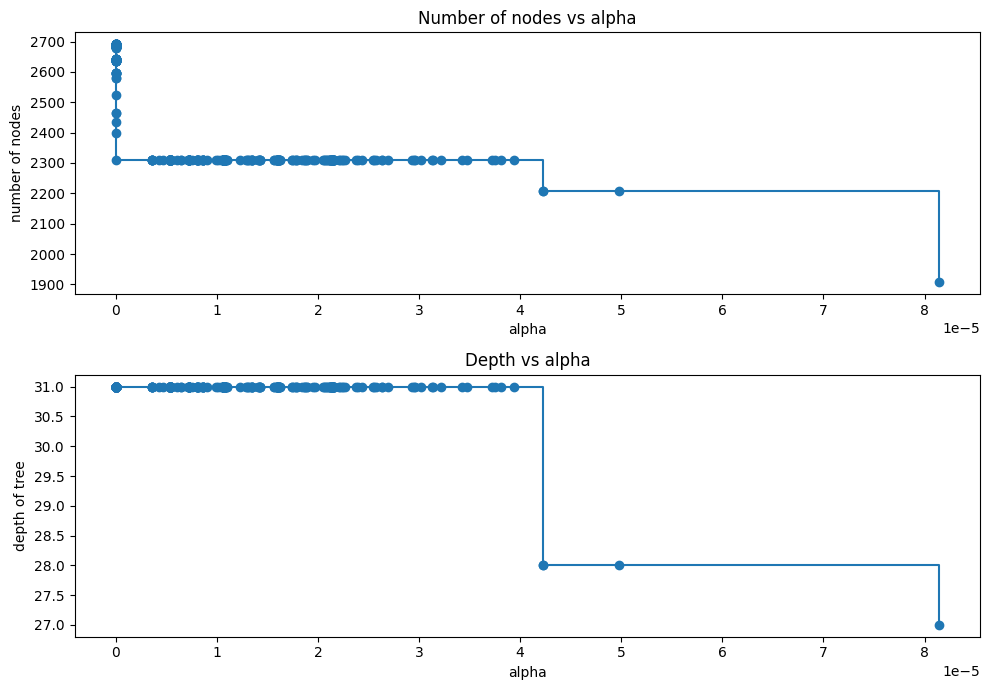

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")


.
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

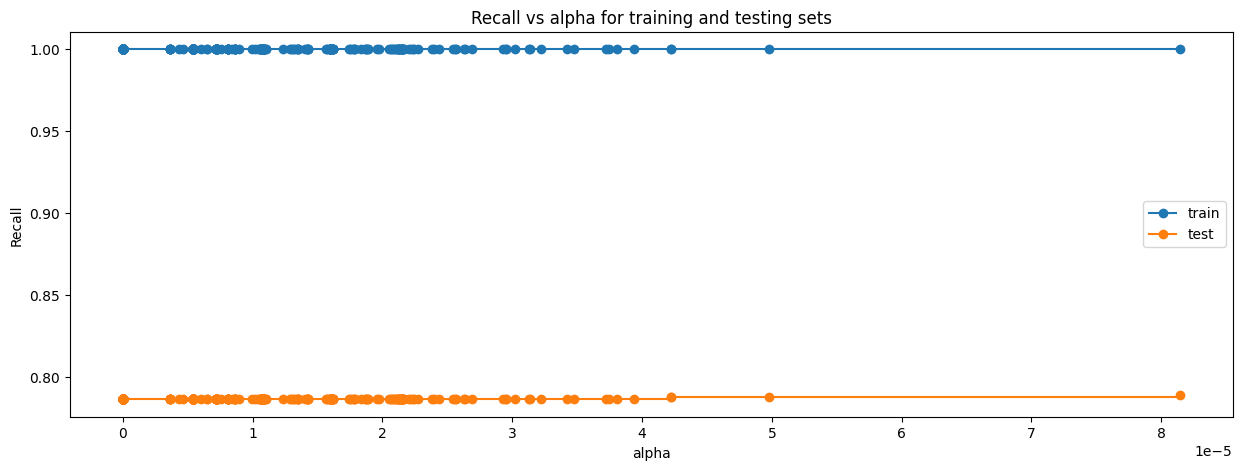

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=8.142327800345593e-05,
                       class_weight={0: 0.13, 1: 0.87}, random_state=1)


In [ ]:
best_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=8.142327800345593e-05,
                       class_weight={0: 0.13, 1: 0.87}, random_state=1)

In [ ]:
decision_tree_ccptune_perf_train = model_performance_classification_sklearn(best_model,X_train,y_train) ## Comodelmplete the code to check performance on train data
decision_tree_ccptune_perf_train

Accuracy  Recall  Precision       F1
0    0.9875     1.0   0.910164  0.95297

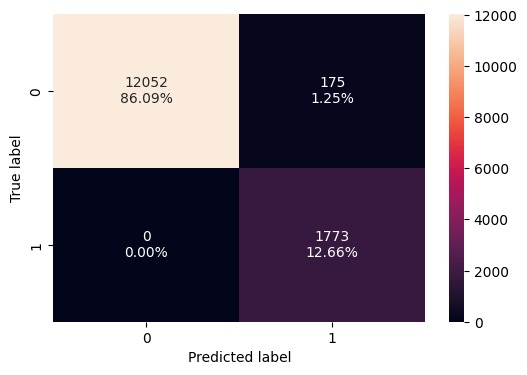

In [ ]:
confusion_matrix_sklearn(best_model,X_train,y_train)  # Complete the code to get the confusion matrix on test data

In [ ]:
decision_tree_ccptune_perf_test = model_performance_classification_sklearn(best_model,X_test,y_test) ## Comodelmplete the code to check performance on train data
decision_tree_ccptune_perf_test

Accuracy    Recall  Precision        F1
0  0.919167  0.788904   0.639254  0.706239

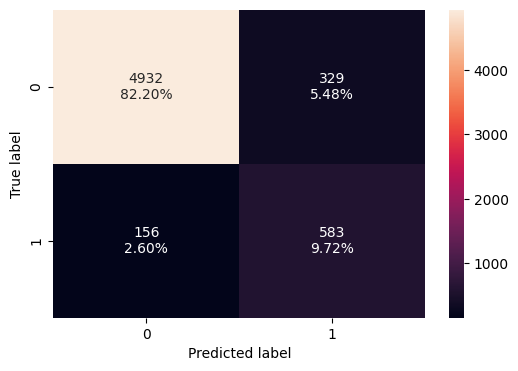

In [ ]:
confusion_matrix_sklearn(best_model,X_test,y_test)  # Complete the code to get the confusion matrix on test data

**Visualizing the Decision Tree**

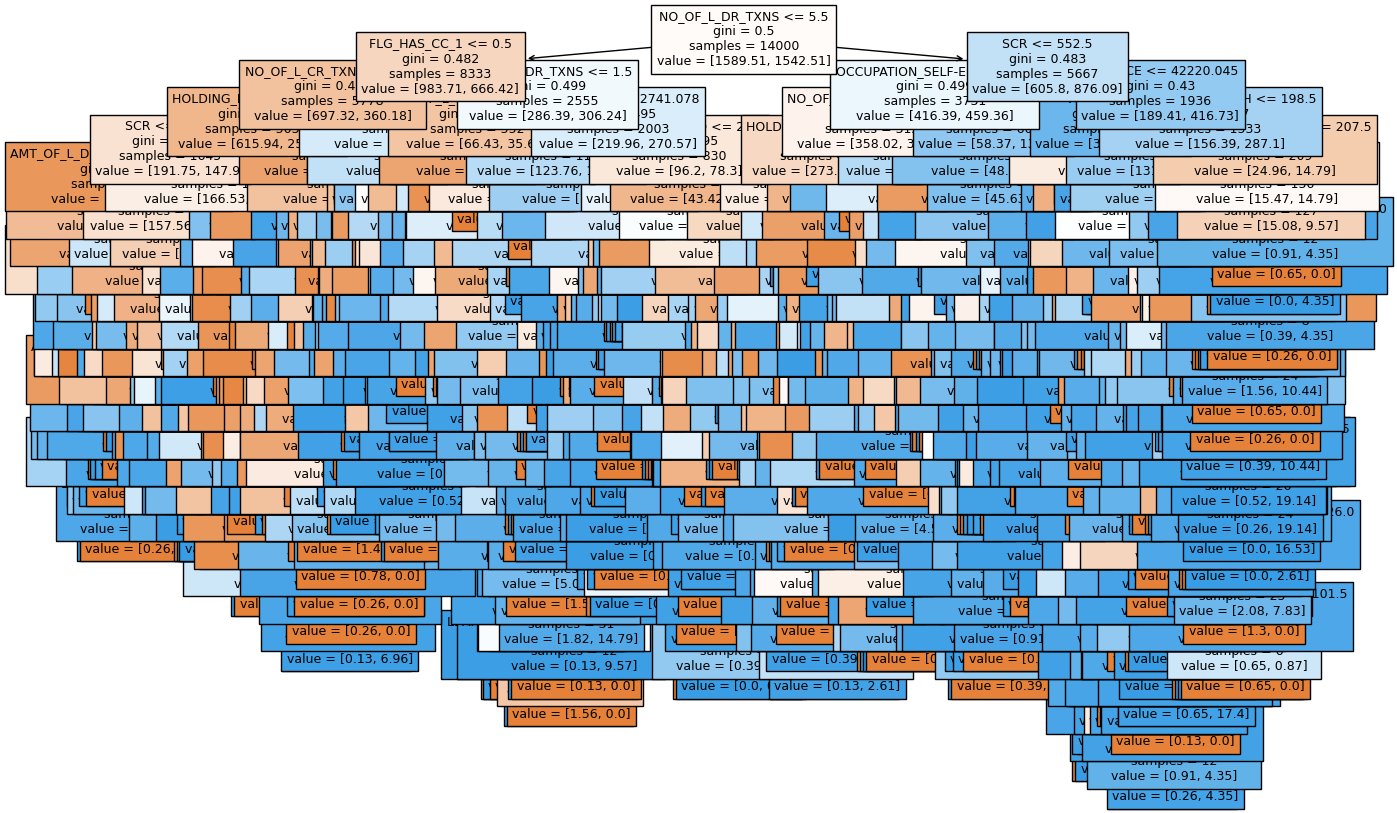

In [ ]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- NO_OF_L_DR_TXNS <= 5.50
|   |--- FLG_HAS_CC_1 <= 0.50
|   |   |--- NO_OF_L_CR_TXNS <= 16.50
|   |   |   |--- HOLDING_PERIOD <= 12.50
|   |   |   |   |--- SCR <= 172.00
|   |   |   |   |   |--- AMT_OF_L_DR_TXNS <= 709086.50
|   |   |   |   |   |   |--- weights: [15.86, 0.00] class: 0
|   |   |   |   |   |--- AMT_OF_L_DR_TXNS >  709086.50
|   |   |   |   |   |   |--- AMT_OF_L_DR_TXNS <= 731134.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.74] class: 1
|   |   |   |   |   |   |--- AMT_OF_L_DR_TXNS >  731134.50
|   |   |   |   |   |   |   |--- LEN_OF_RLTN_IN_MNTH <= 147.00
|   |   |   |   |   |   |   |   |--- weights: [5.85, 0.00] class: 0
|   |   |   |   |   |   |   |--- LEN_OF_RLTN_IN_MNTH >  147.00
|   |   |   |   |   |   |   |   |--- AMT_OF_L_DR_TXNS <= 1033225.00
|   |   |   |   |   |   |   |   |   |--- weights: [2.34, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- AMT_OF_L_DR_TXNS >  1033225.00
|   |   |   |   |   |   |   |   |   |--- NO_OF_L_CR_TXNS <= 8.00
|   |  

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                          Imp
SCR                  0.135564
BALANCE              0.128273
LEN_OF_RLTN_IN_MNTH  0.115143
AMT_OF_L_DR_TXNS     0.109440
HOLDING_PERIOD       0.099490
NO_OF_L_CR_TXNS      0.094877
AGE                  0.079024
NO_OF_L_DR_TXNS      0.065063
ACC_OP_Month         0.056290
OCCUPATION_SELF-EMP  0.022477
FLG_HAS_CC_1         0.018510
ACC_TYPE_SA          0.017093
OCCUPATION_SAL       0.016575
GENDER_M             0.010938
OCCUPATION_SENP      0.008112
FLG_HAS_OLD_LOAN_1   0.007359
FLG_HAS_ANY_CHGS_1   0.007353
FLG_HAS_NOMINEE_1    0.005692
GENDER_O             0.002728


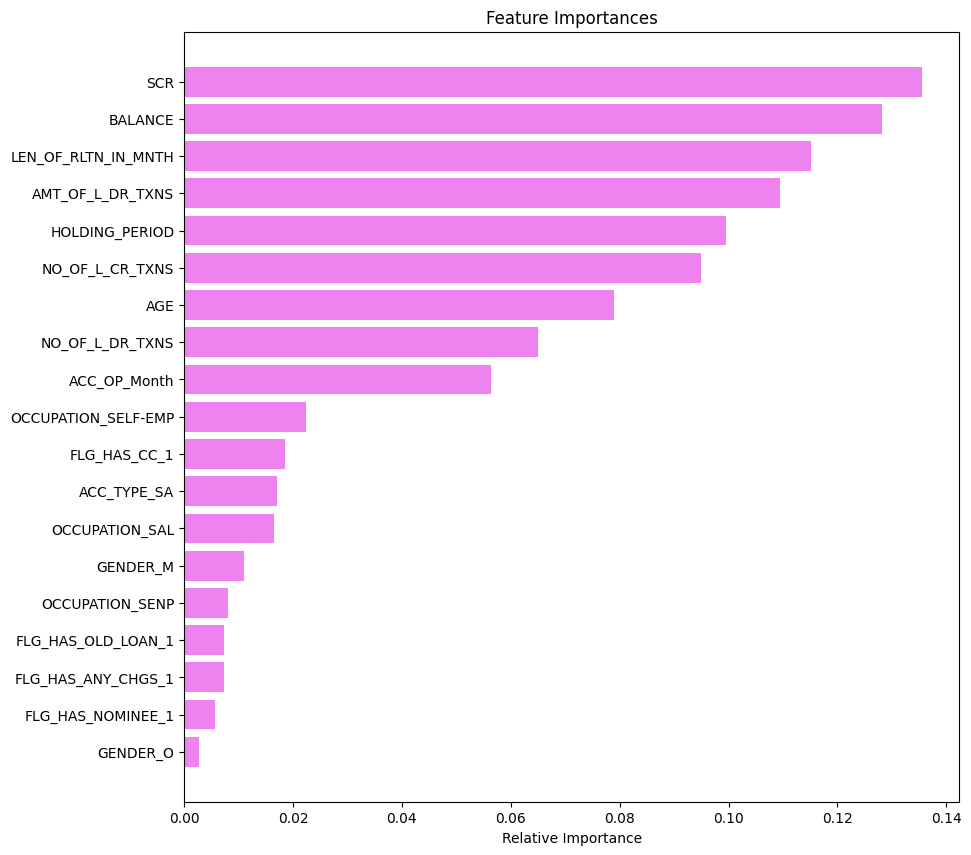

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Model Performance Comparison: Decision Tree

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)
Accuracy                     1.0                     0.892000
Recall                       1.0                     0.989848
Precision                    1.0                     0.540166
F1                           1.0                     0.698925

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T,decision_tree_ccptune_perf_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree(CCP tuning)"]
print("Test performance comparison:")
models_test_comp_df ## Complete the code to compare performance of test set

Test performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.935167                     0.834167   
Recall                  0.786198                     0.815968   
Precision               0.715517                     0.412449   
F1                      0.749194                     0.547933   

           Decision Tree(CCP tuning)  
Accuracy                    0.919167  
Recall                      0.788904  
Precision                   0.639254  
F1                          0.706239

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Decision Tree sklearn'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Decision Tree (Pre-Pruning)'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Decision Tree(CCP tuning)'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Decision Tree sklearn'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Decision Tree (Pre-Pruning)'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Decision Tree(CCP tuning)'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_6, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_7, *[[['Decision Tree sklearn', 'Decision Tree (Pre-Pruning)'], ['Decision Tree (Pre-Pruning)', 'Decision Tree(CCP tuning)']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_8, *['Decision Tree sklearn', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_9, *['Decision Tree (Pre-Pruning)', 'index'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_10, *['Decision Tree(CCP tuning)', 'index'], **{'inner': 'stick'})
chart

## Actionable Insights and Business Recommendations

**What recommedations would you suggest to the bank?**

*

___